In [2]:
import sys
sys.path.append('../../')
from SynRBL.rsmi_utils import load_database
golden = load_database('../../Data/Validation_set/golden_dataset/rule_based_reactions.json.gz')
ground_truth = load_database('../../Data/Validation_set/golden_dataset/rule_based_ground_truth.json.gz')
key_wrong = [11, 234, 213, 221, 225, 227, 233, 239, 240, 241, 242, 249, 270, 273, 283, 366, 374, 375, 444, 449, 481, 663]
golden_wrong = [golden[key] for key in key_wrong]
rid_wrong = [golden[key]['R-id'] for key in key_wrong]
ground_truth_wrong = [ground_truth[key] for key in key_wrong]

In [3]:
a =load_database('../../Data/Validation_set/golden_dataset/mcs_based_reactions.json.gz')

In [4]:
len(a)

888

In [79]:
import pandas as pd
test = pd.concat([pd.DataFrame(golden_wrong).rename(columns={'reactions':'Original Reaction'}), pd.DataFrame(ground_truth_wrong).rename(columns={'reactions':'reactions_ground_truth'}), pd.DataFrame(ground_truth_wrong)], axis=1)[['R-id','Original Reaction','new_reaction','reactions']]
test = test.iloc[:,2:].rename(columns={'new_reaction':'Imputed Reaction', 'reactions':'Ground Truth'}).to_dict('records')

In [94]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from PIL import Image
import io

class ReactionVisualizer:
    def __init__(self, bond_line_width=2, atom_label_font_size=12, padding=0.2):
        self.bond_line_width = bond_line_width
        self.atom_label_font_size = atom_label_font_size
        self.padding = padding

    def visualize_reaction(self, reaction_str: str) -> Image:
        """
        Visualize a single chemical reaction and return the image.

        Parameters
        ----------
        reaction_str : str
            A string representation of the reaction (e.g., 'C1=CC=CC=C1>>CCO').

        Returns
        -------
        PIL.Image.Image
            An image of the chemical reaction.
        """
        # Parse reactants and products from the reaction string
        reactants_str, products_str = reaction_str.split('>>')
        reactants = [Chem.MolFromSmiles(smiles) for smiles in reactants_str.split('.')]
        products = [Chem.MolFromSmiles(smiles) for smiles in products_str.split('.')]
        
        rxn = AllChem.ChemicalReaction()
        for reactant in reactants:
            rxn.AddReactantTemplate(reactant)
        for product in products:
            rxn.AddProductTemplate(product)

        # Set up RDKit drawer with customizable parameters
        drawer = Draw.MolDraw2DCairo(1000, 600)  # Adjust canvas size as needed
        opts = drawer.drawOptions()
        opts.bondLineWidth = self.bond_line_width  # Increase bond line width
        opts.atomLabelFontSize = self.atom_label_font_size  # Increase font size for atom labels
        opts.padding = self.padding  # Adjust padding around the drawing

        drawer.DrawReaction(rxn, highlightByReactant=True)
        drawer.FinishDrawing()
        return Image.open(io.BytesIO(drawer.GetDrawingText()))



In [97]:
import matplotlib.pyplot as plt
import numpy as np
import copy
def visualize_reactions(rsmi_dict, id='R-id'):

    reactions_dict = copy.deepcopy(rsmi_dict)
    reactions_dict.pop(id)
    fig, axs = plt.subplots(3, 1, figsize=(25, 20), gridspec_kw={'hspace': 0.01})
    for i, (name, reaction_str) in enumerate(reactions_dict.items()):
        
        visualizer = ReactionVisualizer()
        img = visualizer.visualize_reaction(reaction_str)
        
        # Assuming img is a PIL image, convert it to a format compatible with matplotlib
        img_array = np.array(img)  # Convert PIL.Image to numpy array
        
        axs[i].imshow(img_array)
        axs[i].axis('off')
        axs[i].set_title(name+' '+rsmi_dict[id], fontsize=20, weight = 'bold')
            
    plt.tight_layout(pad=0.01, h_pad=0.01, w_pad=0.01)  # Adjust padding and space
    return fig


/tmp/ipykernel_772285/2631802312.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.01, h_pad=0.01, w_pad=0.01)  # Adjust padding and space


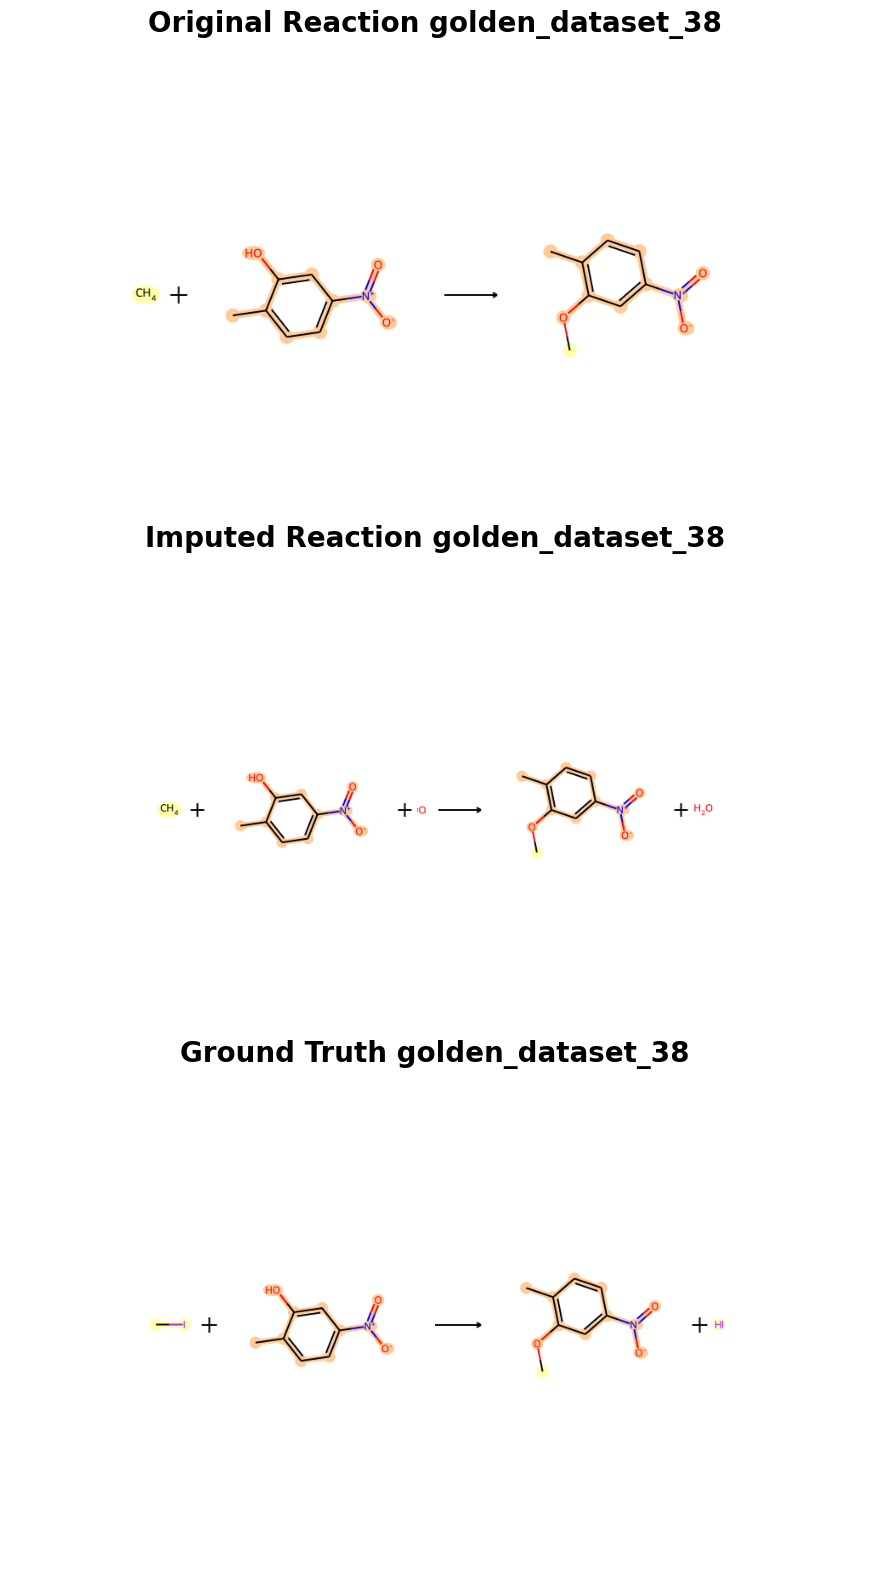

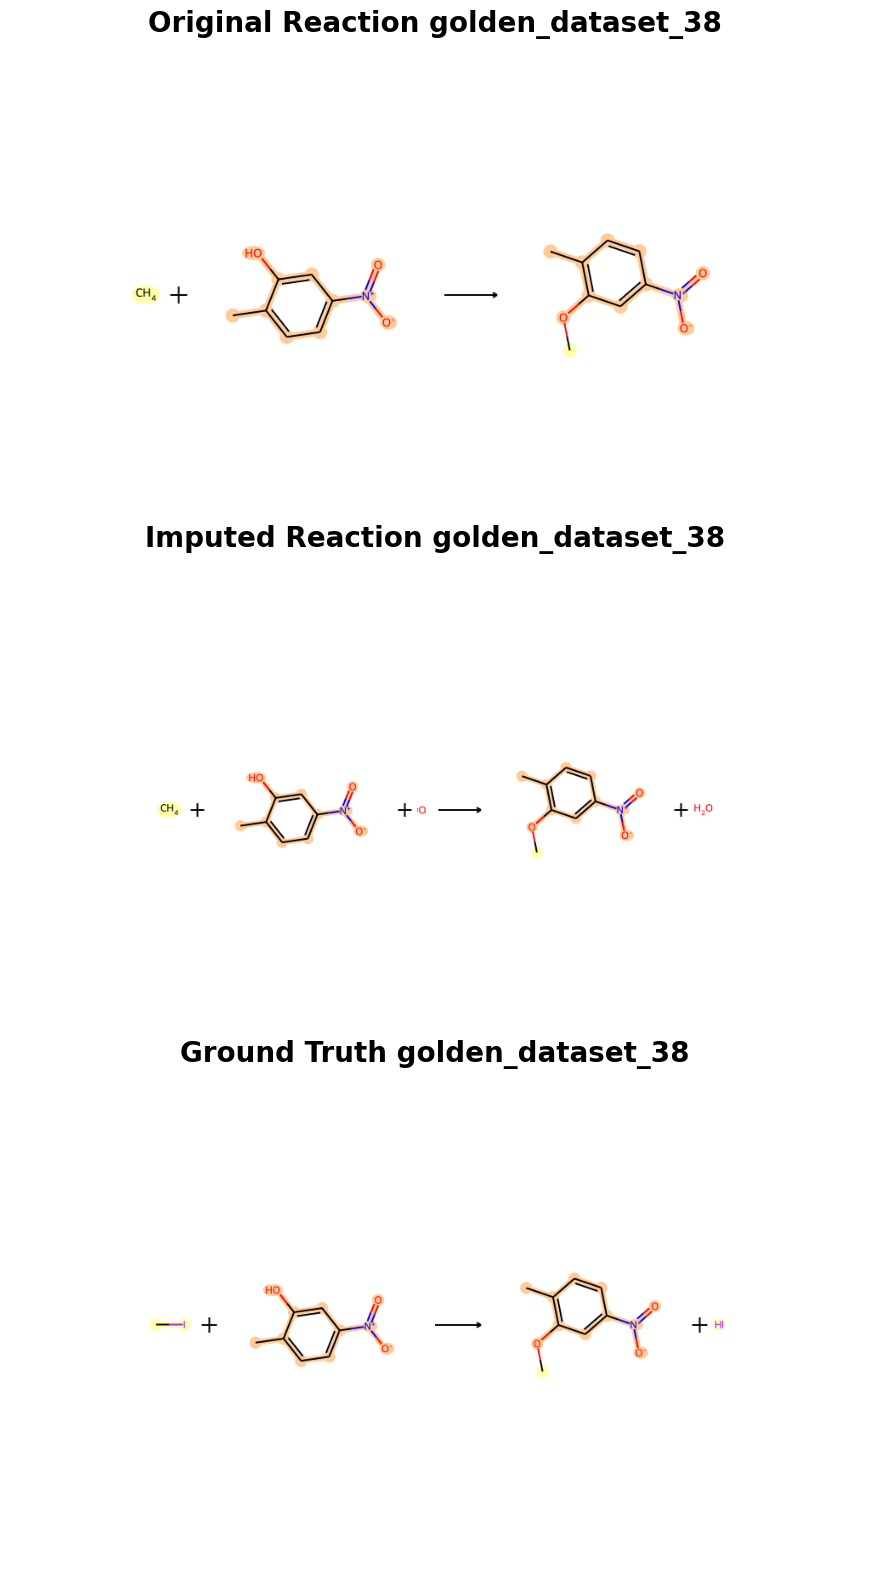

In [98]:
visualize_reactions(test[0])

/tmp/ipykernel_772285/4105020327.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.01, h_pad=0.01, w_pad=0.01)  # Adjust padding and space
[15:50:44] WARNING: not removing hydrogen atom without neighbors
[15:50:44] WARNING: not removing hydrogen atom without neighbors
/tmp/ipykernel_772285/4105020327.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(3, 1, figsize=(25, 15), gridspec_kw={'hspace': 0.01})
[15:50:44] WARNING: not removing hydrogen atom without neighbors
[15:50:44] WARNING: not removing hydrogen atom without neighbors


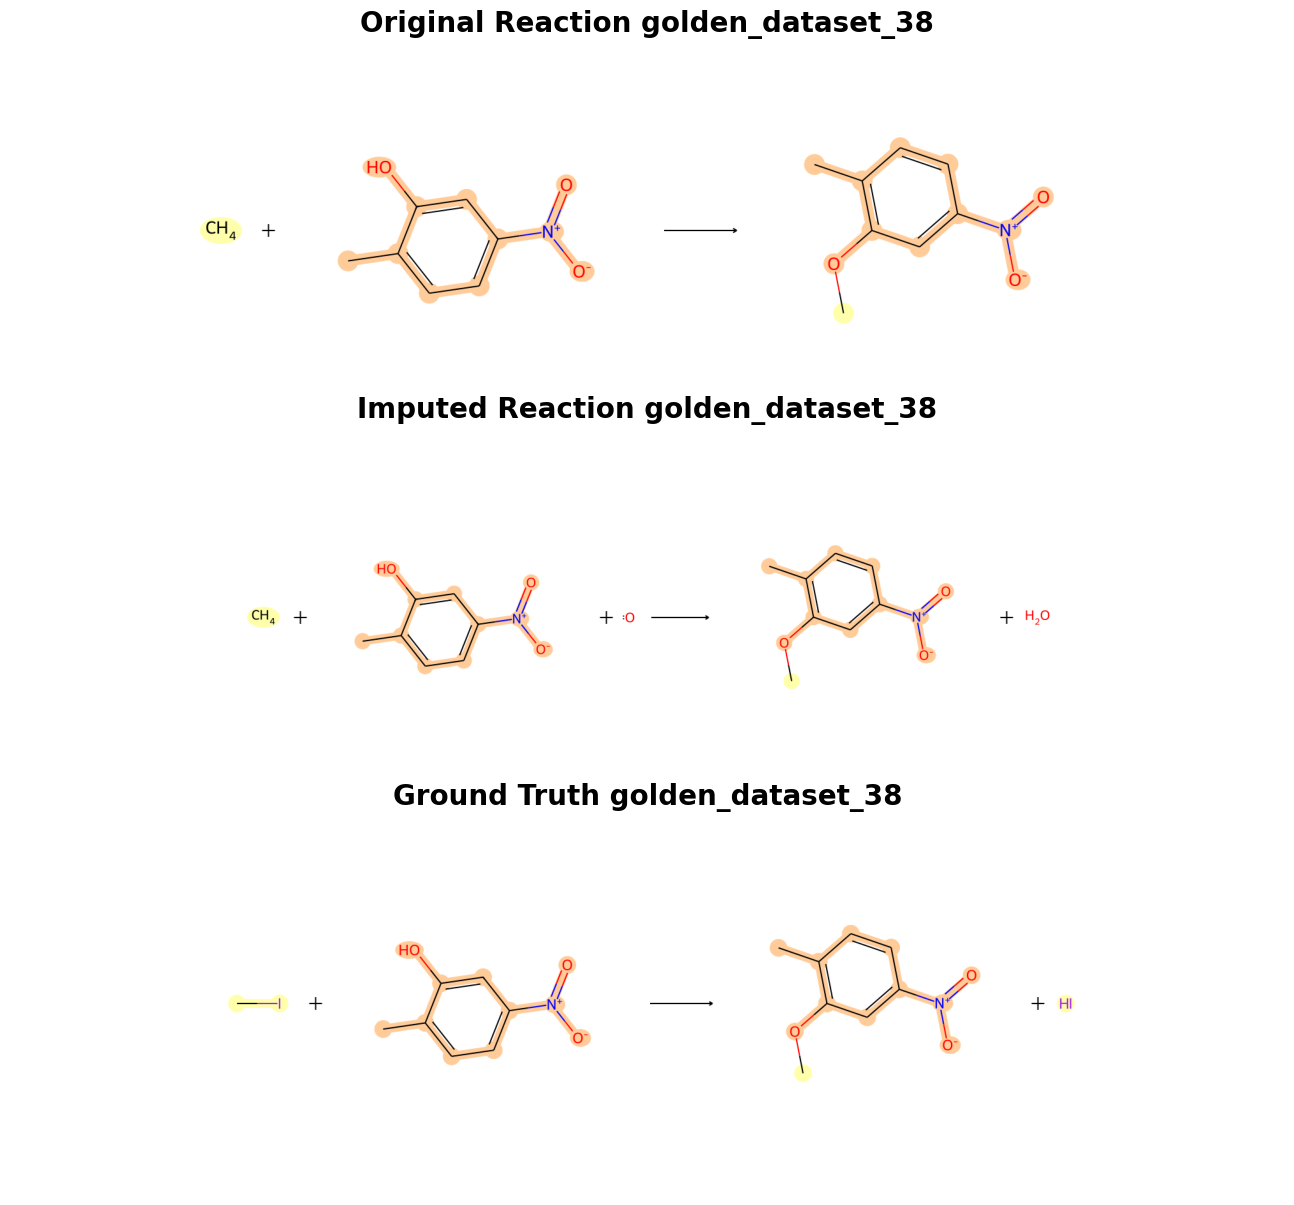

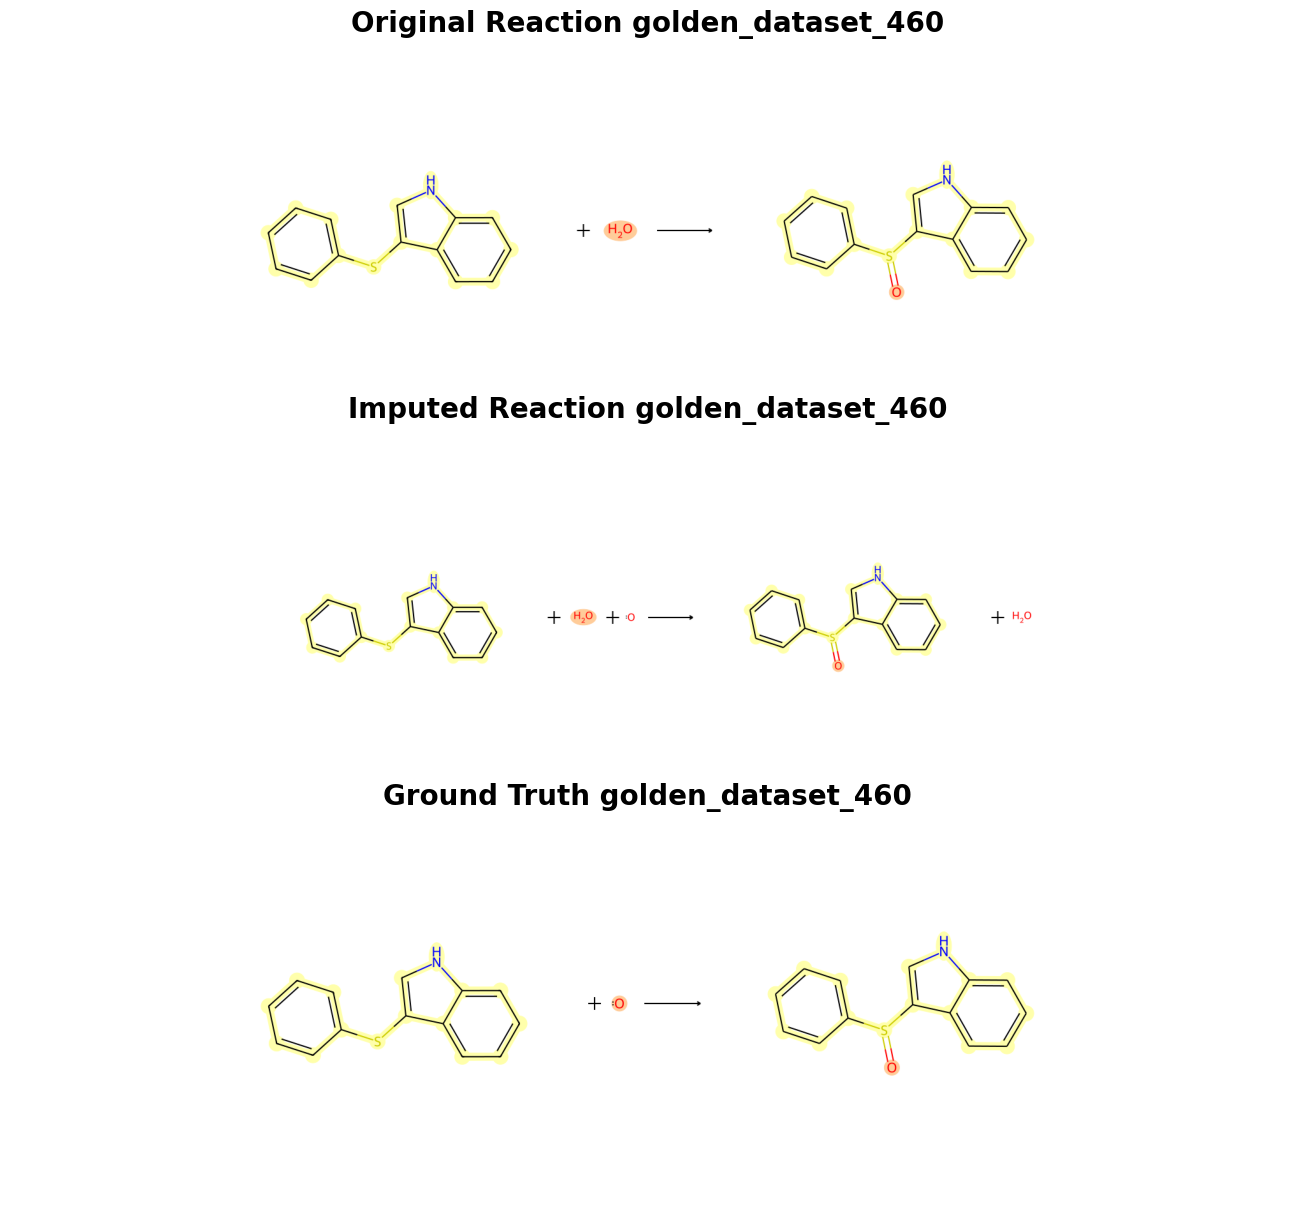

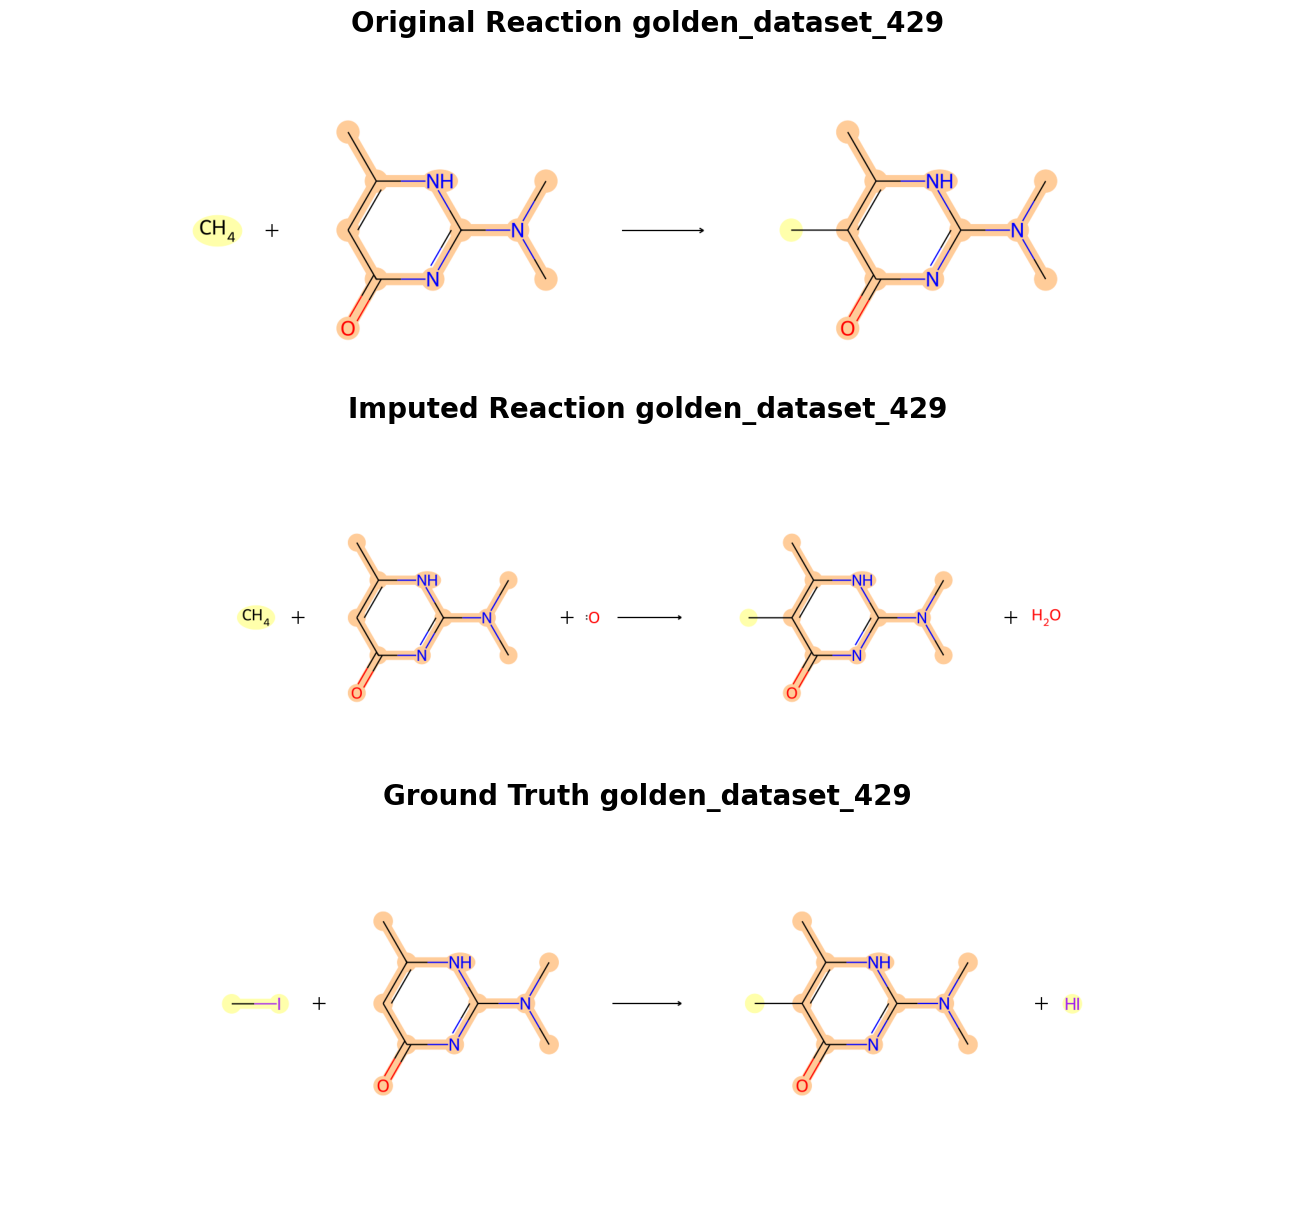

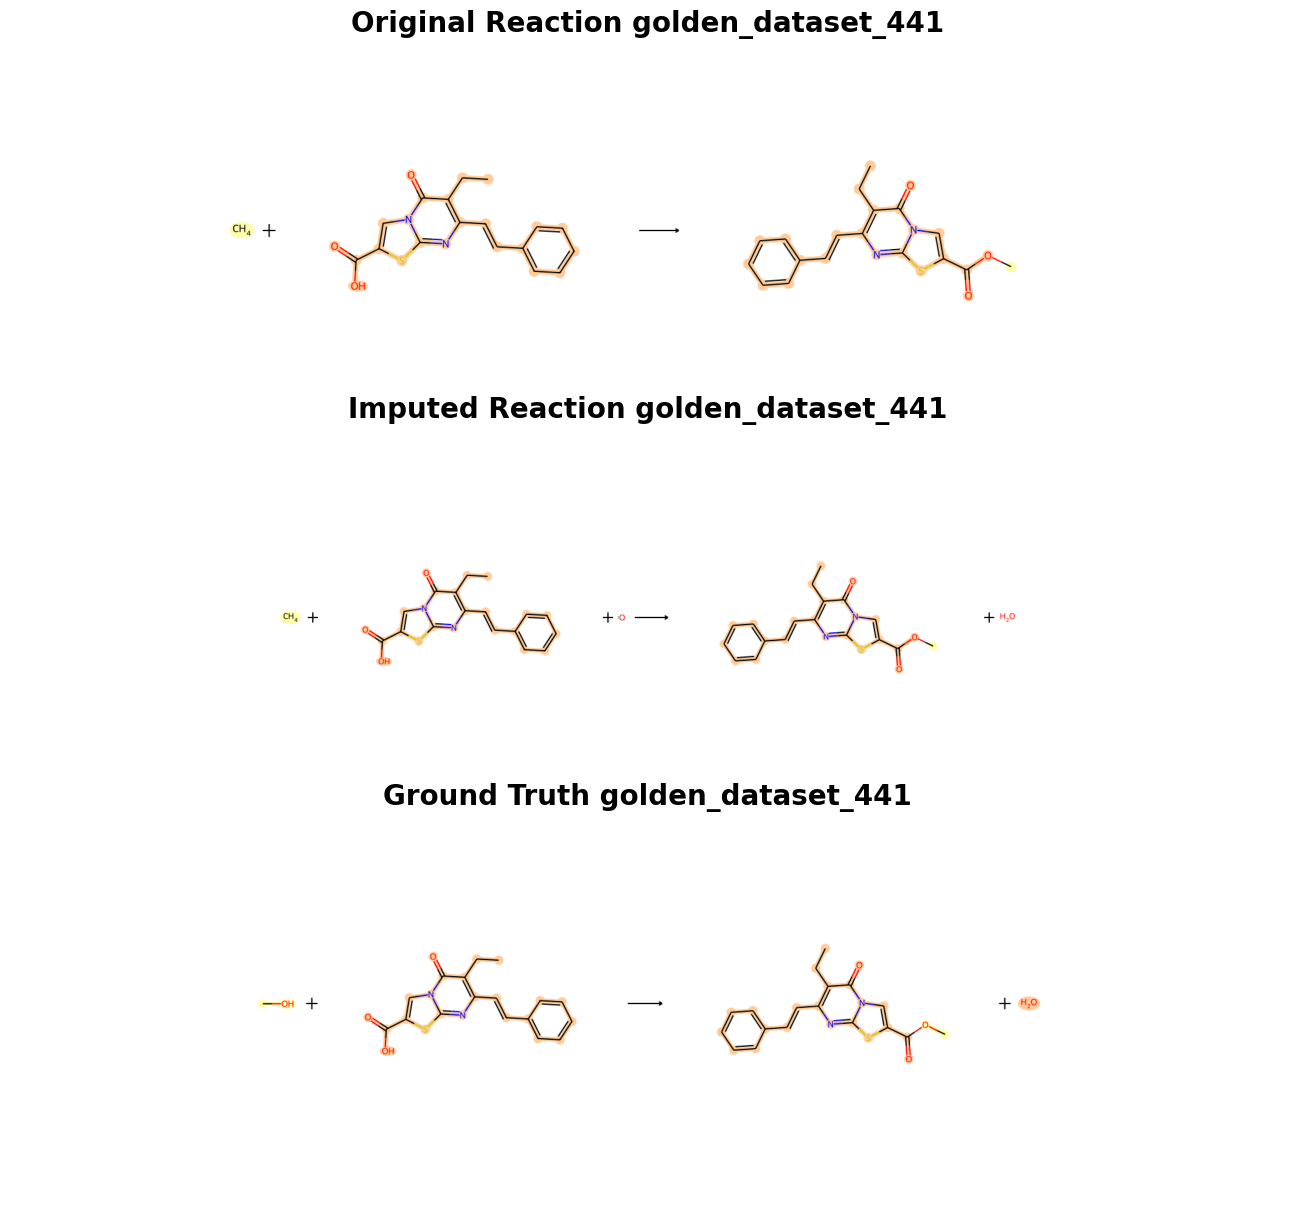

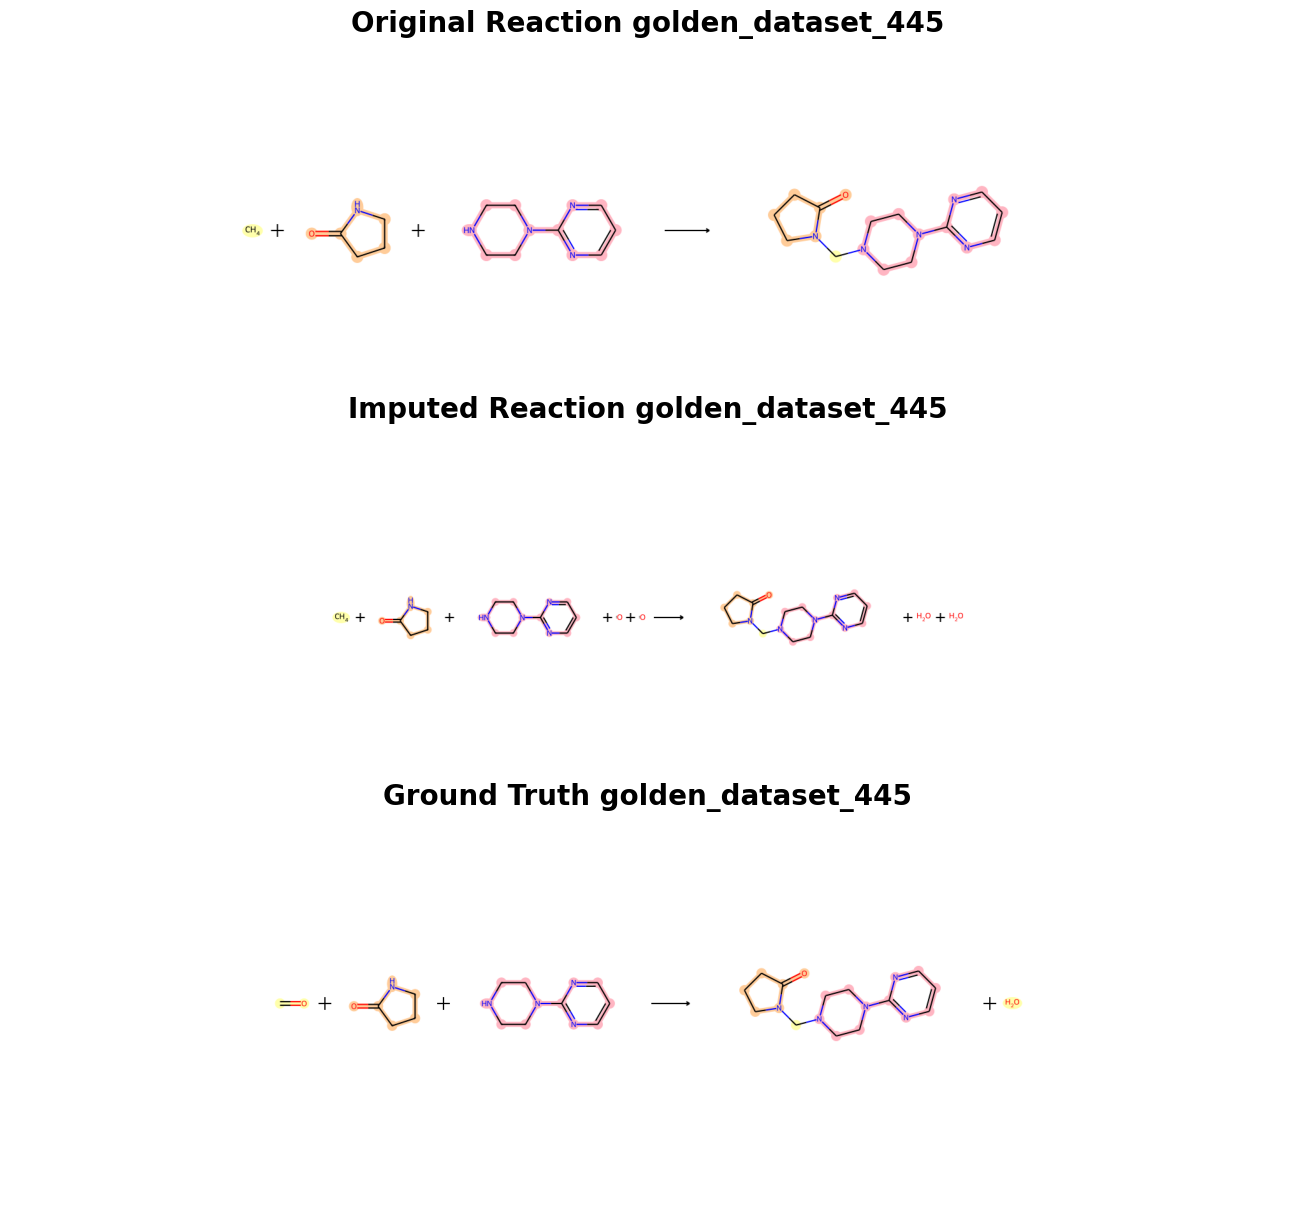

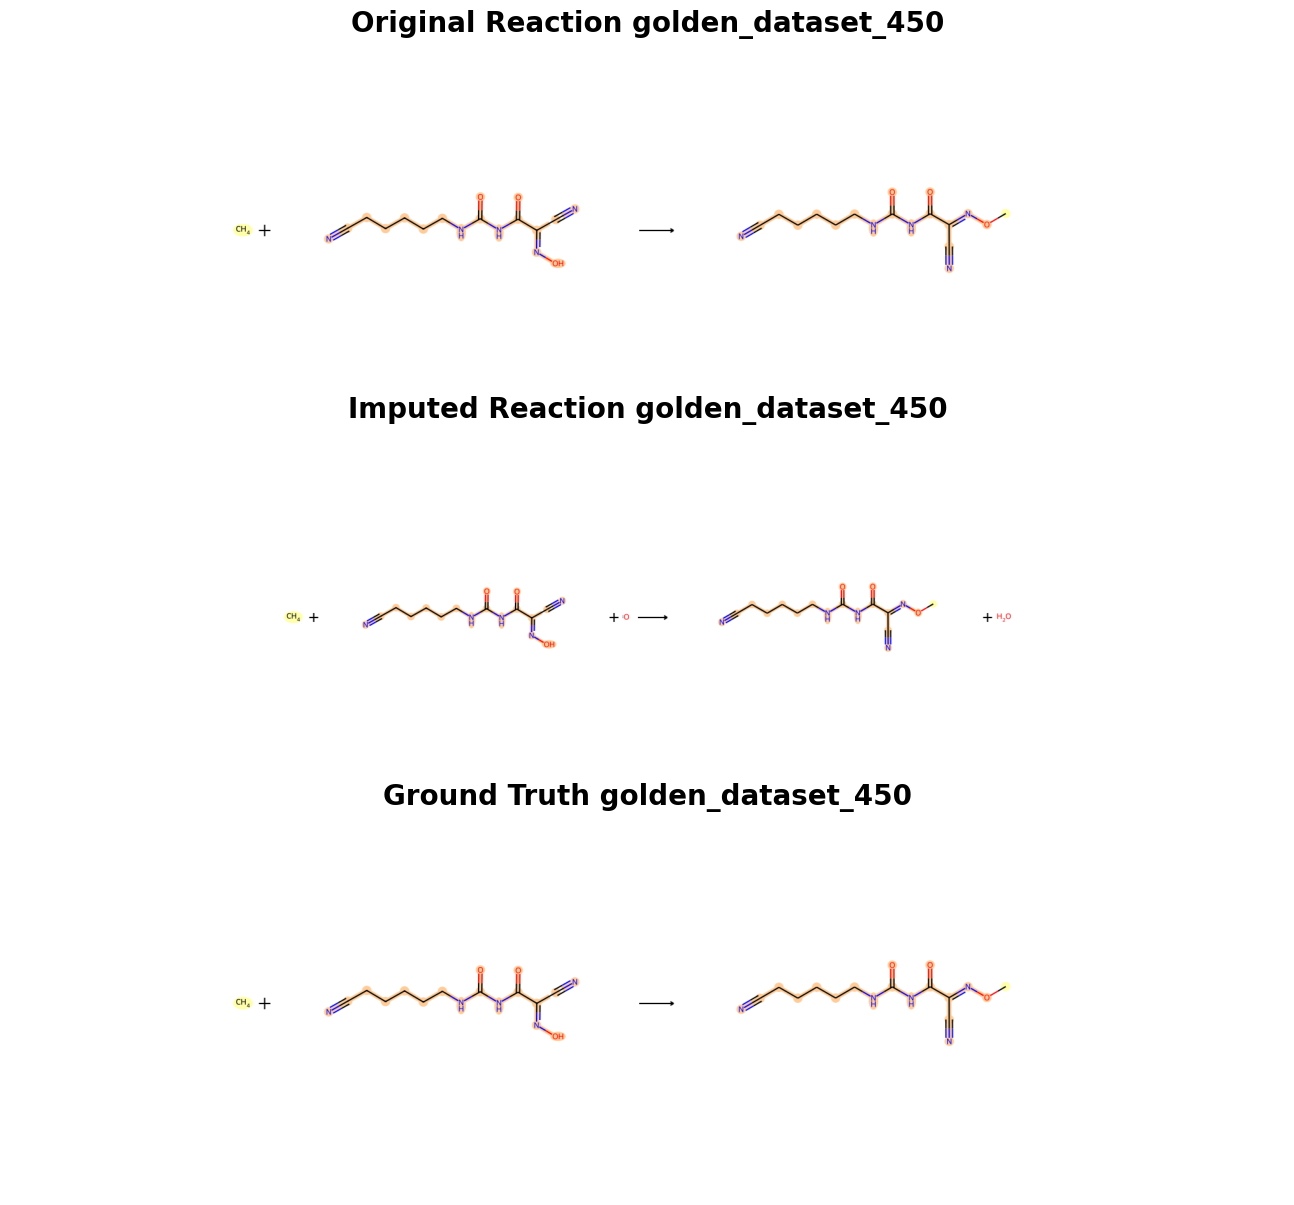

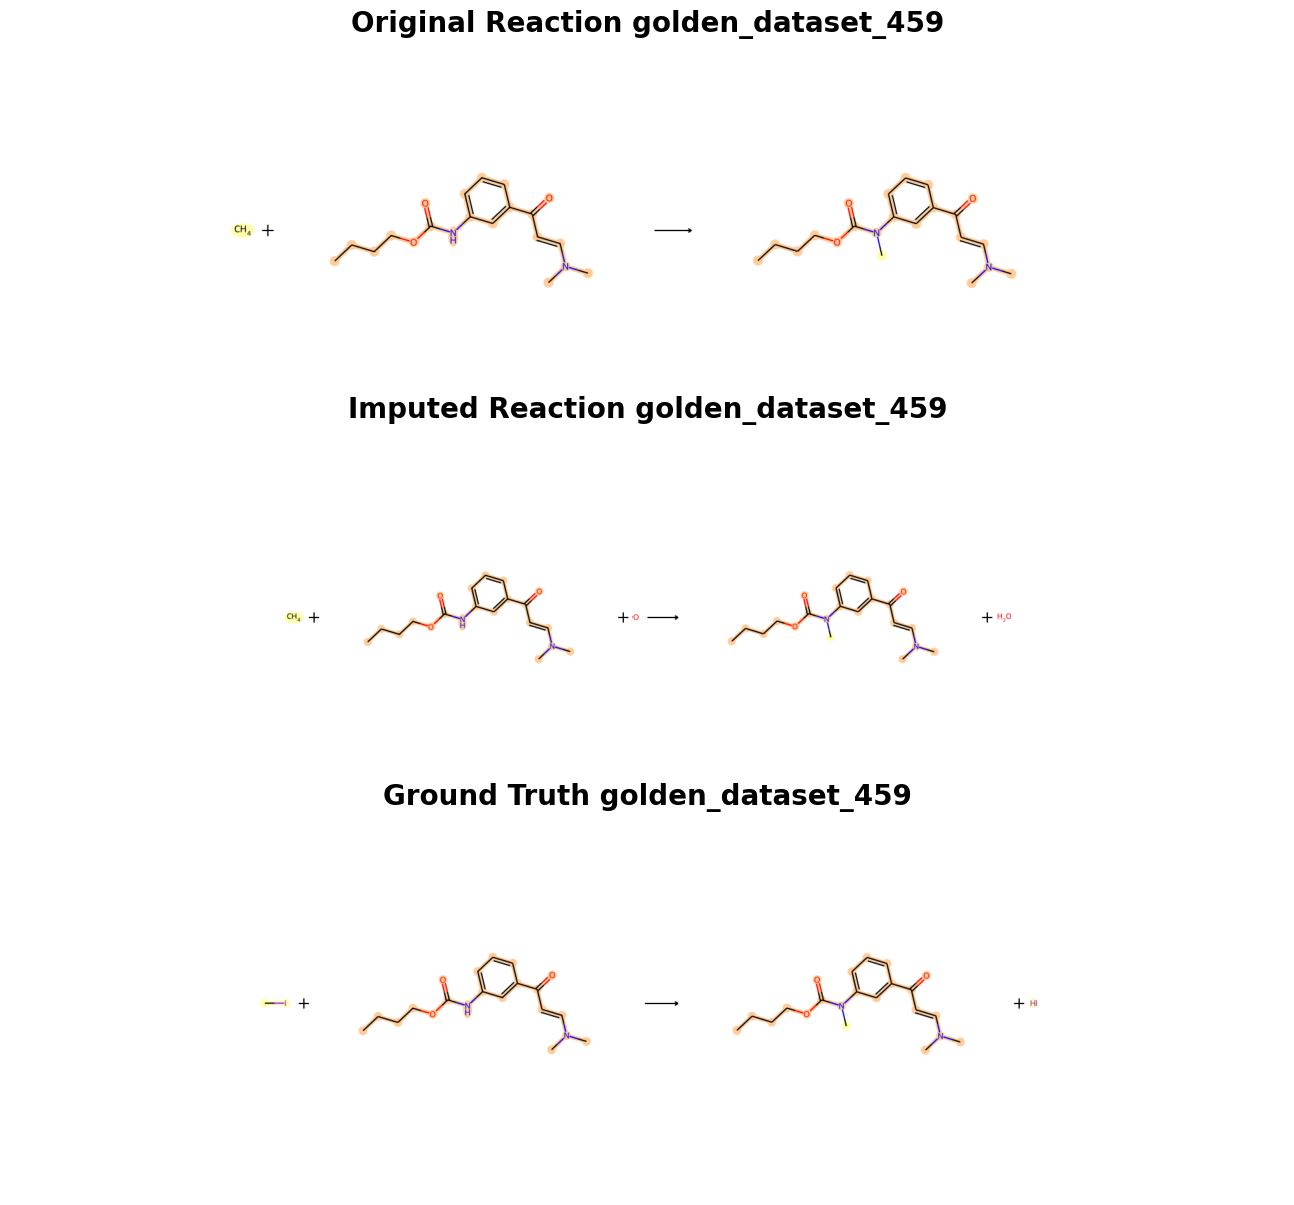

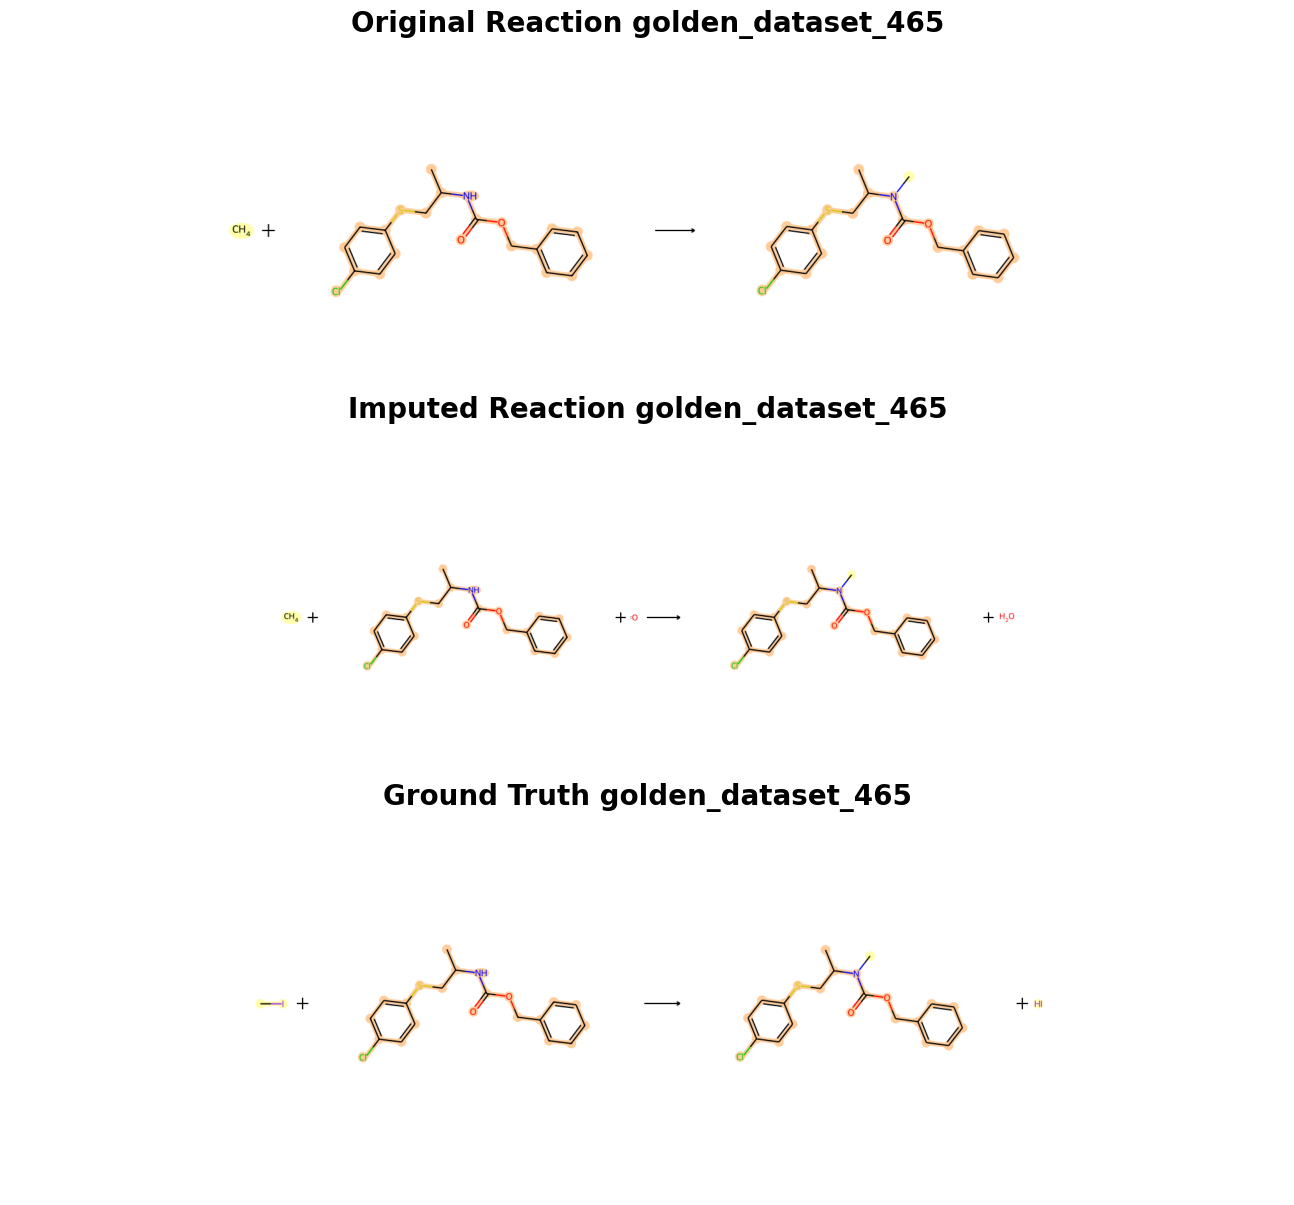

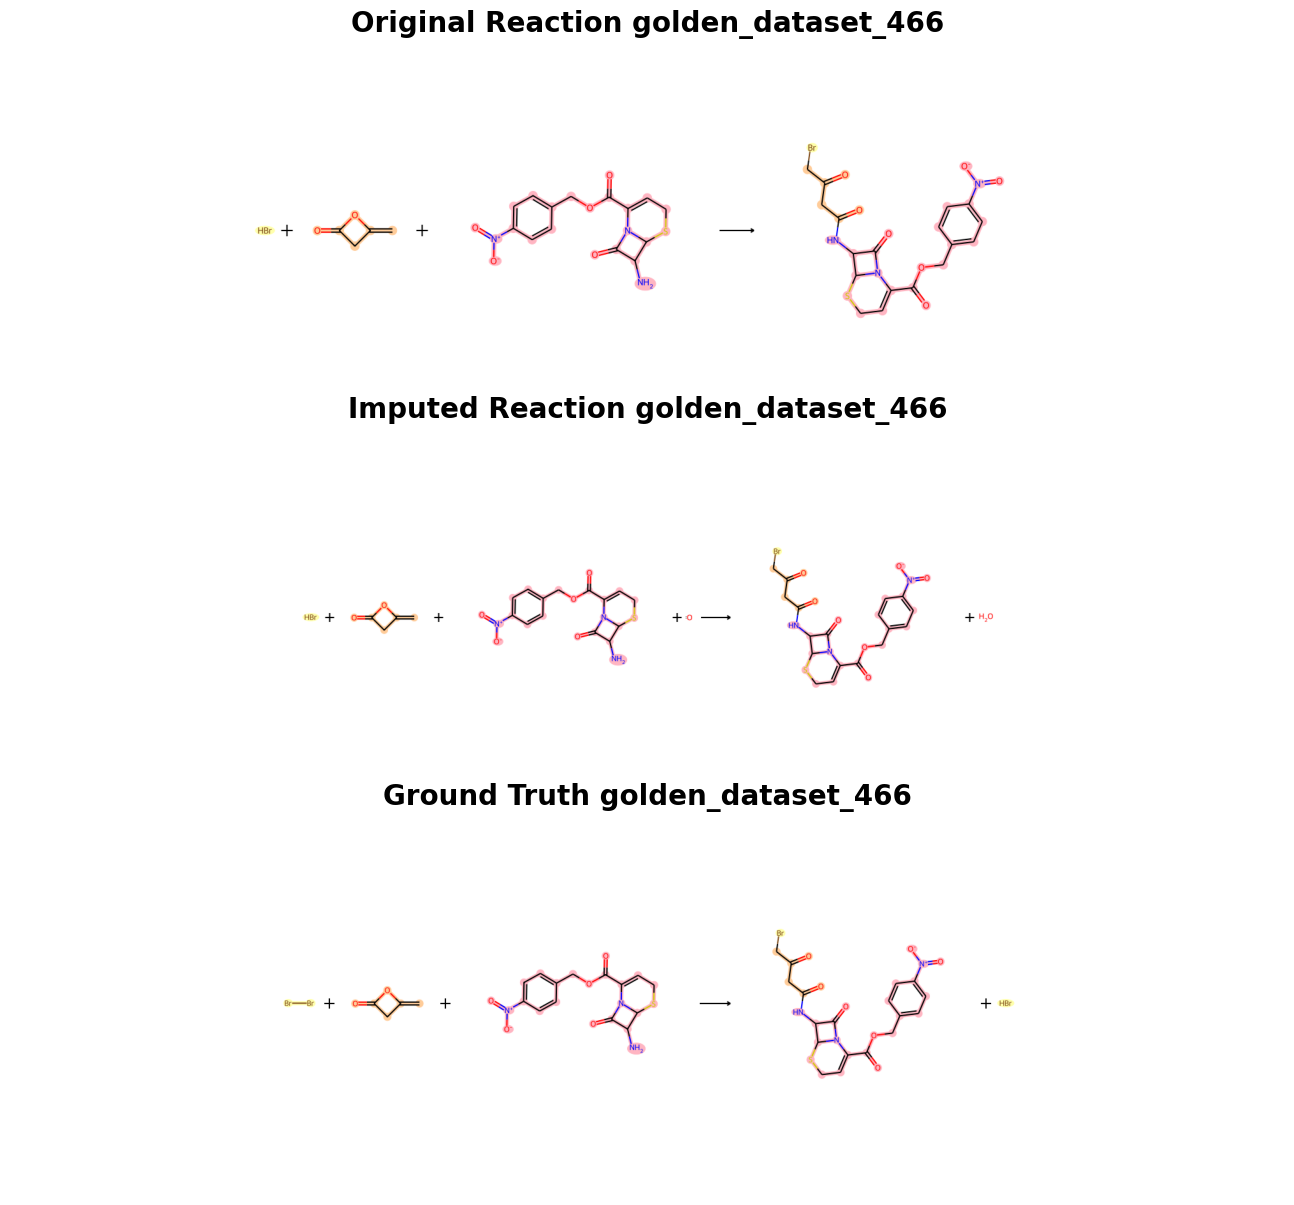

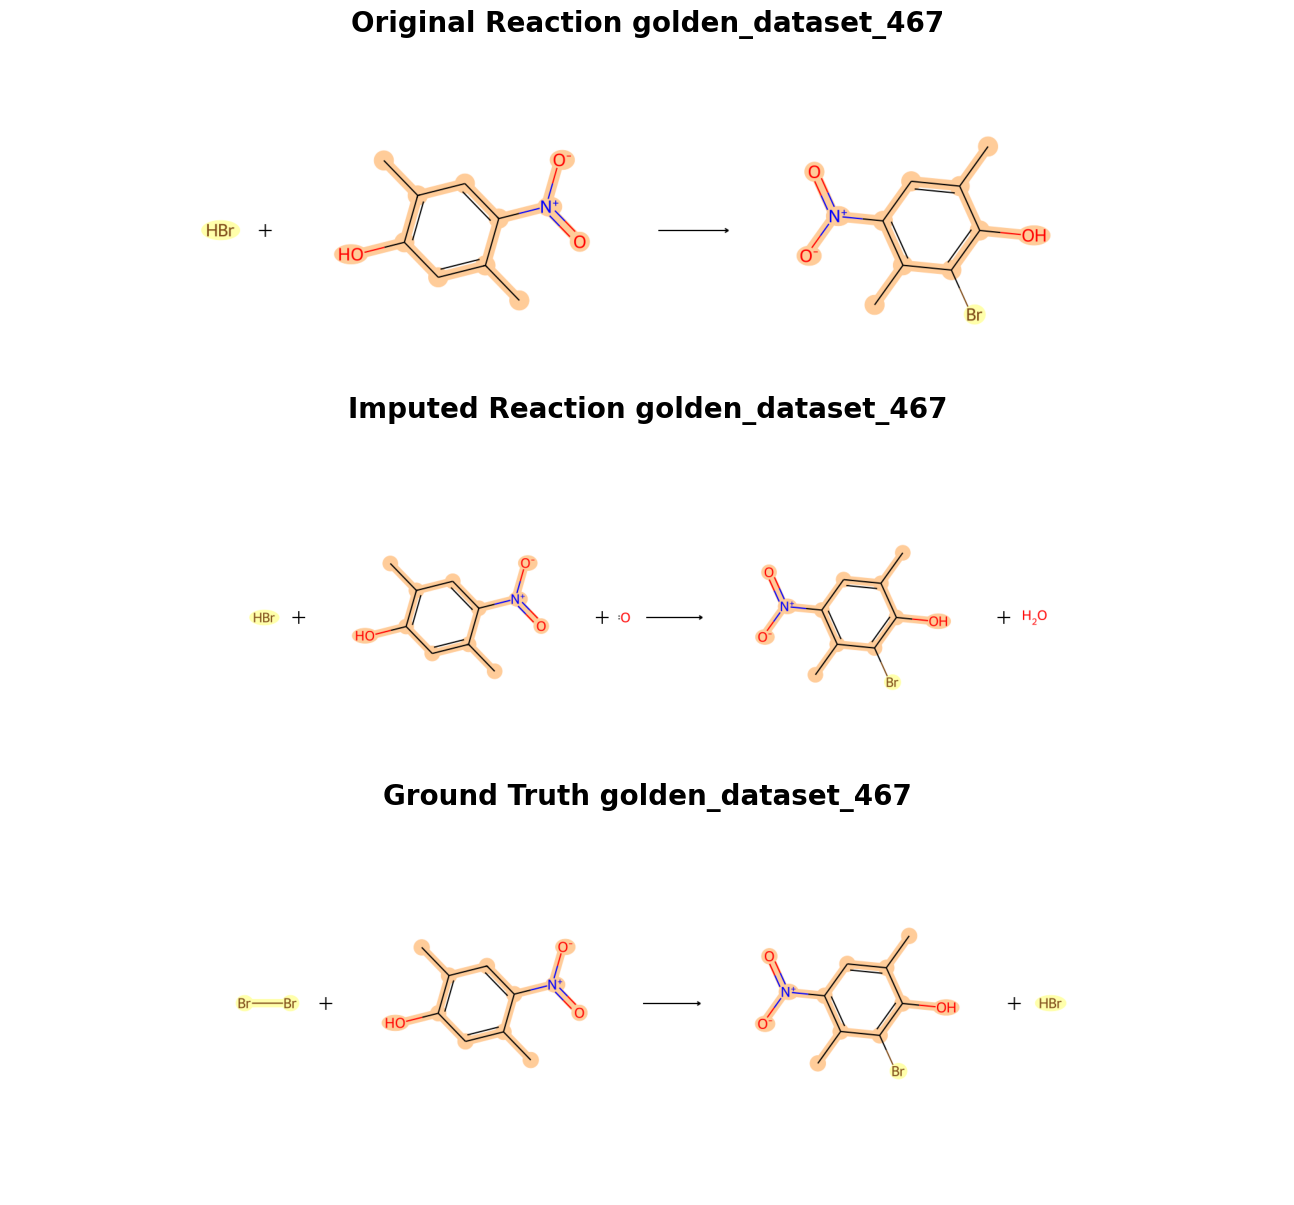

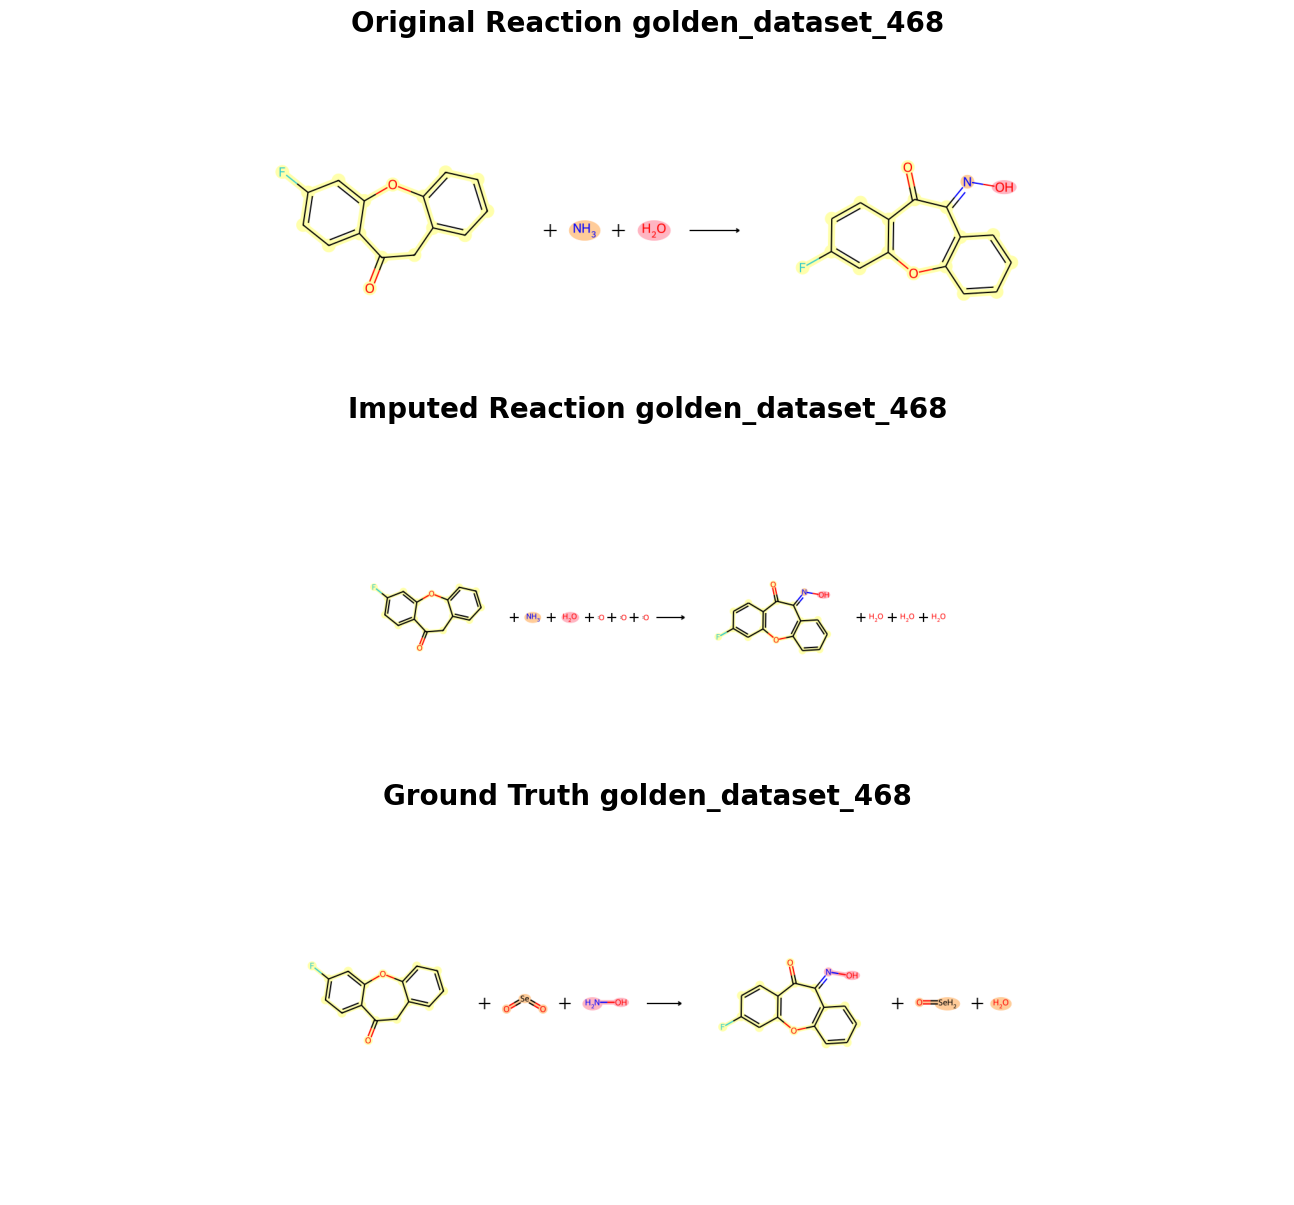

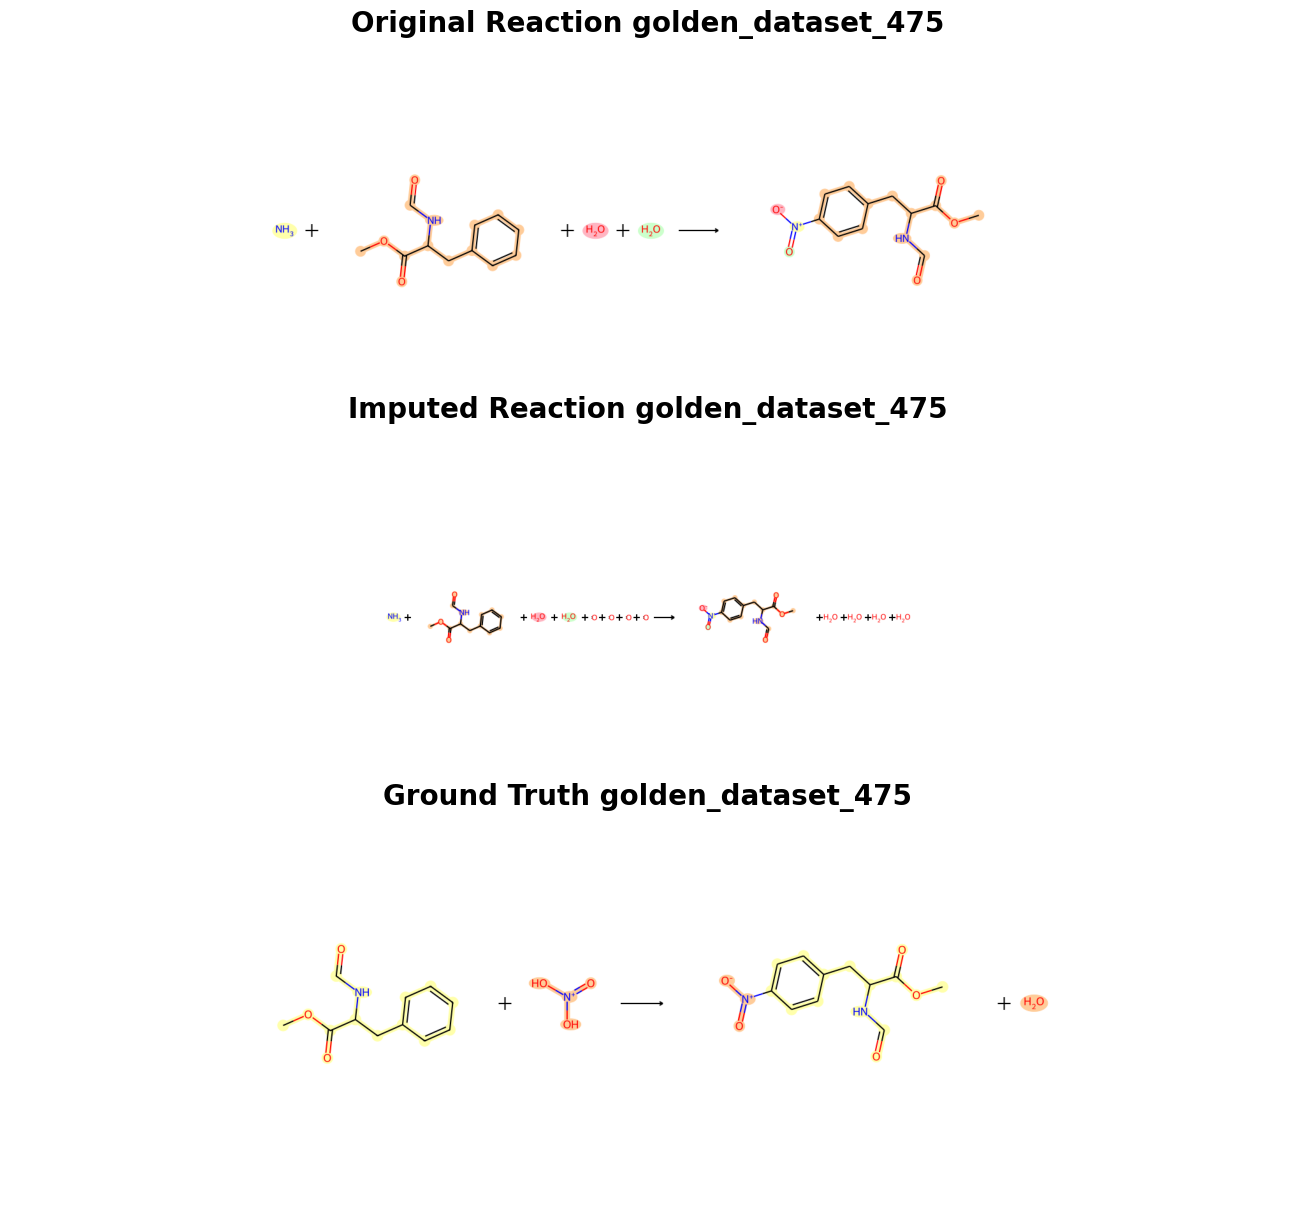

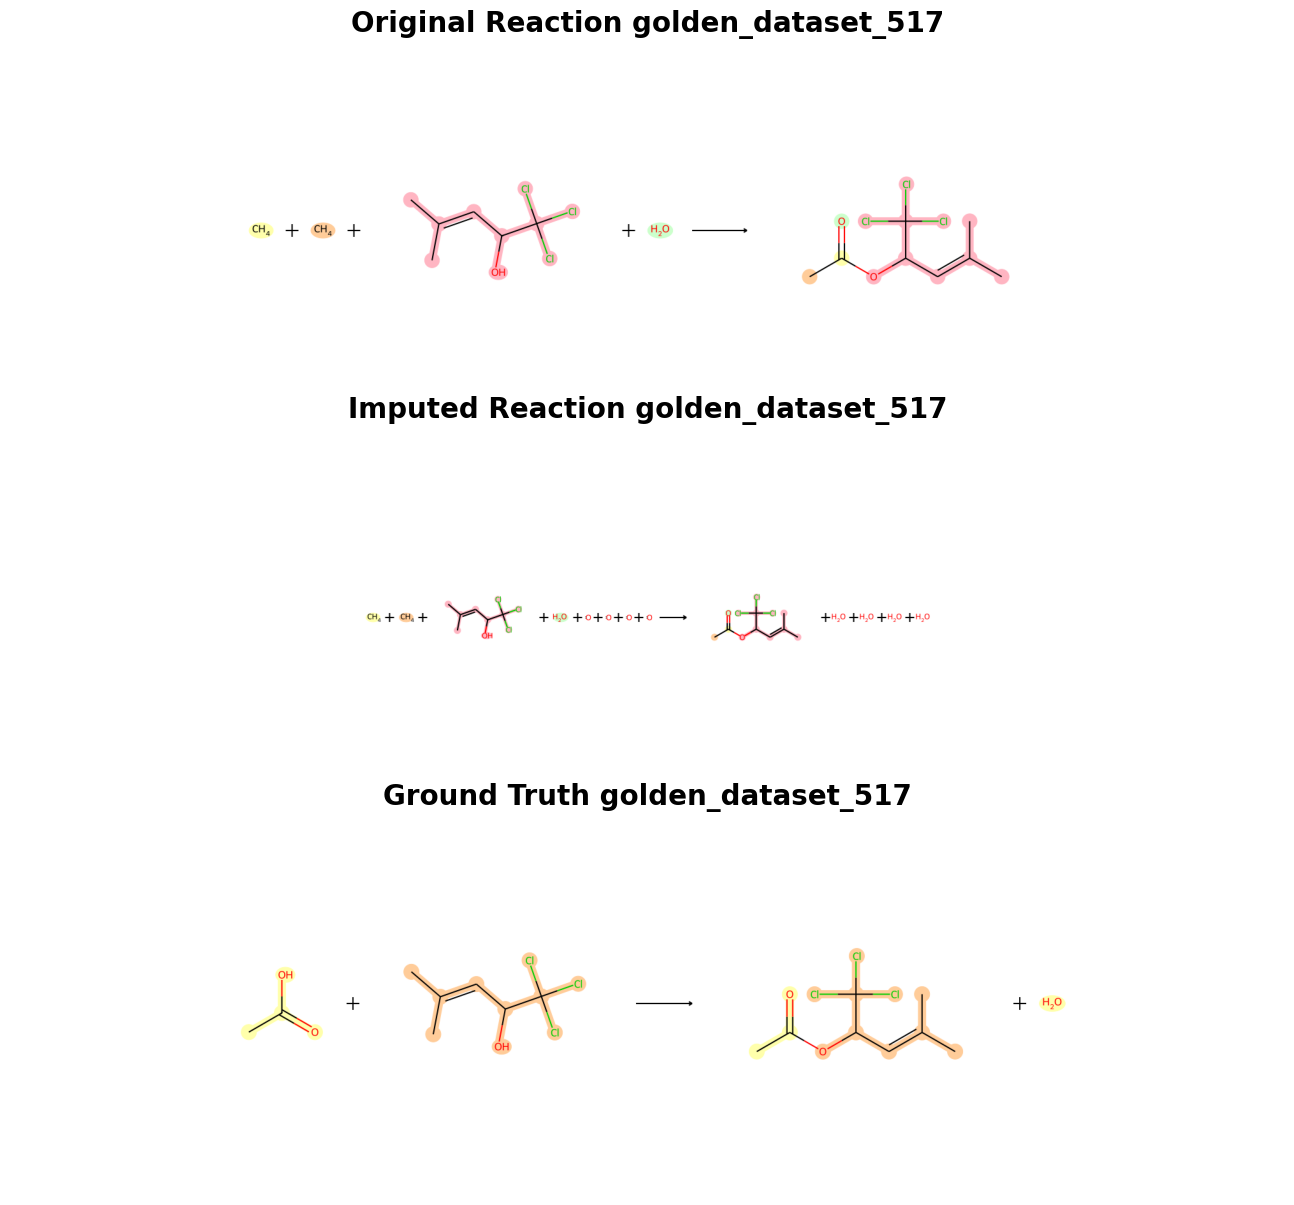

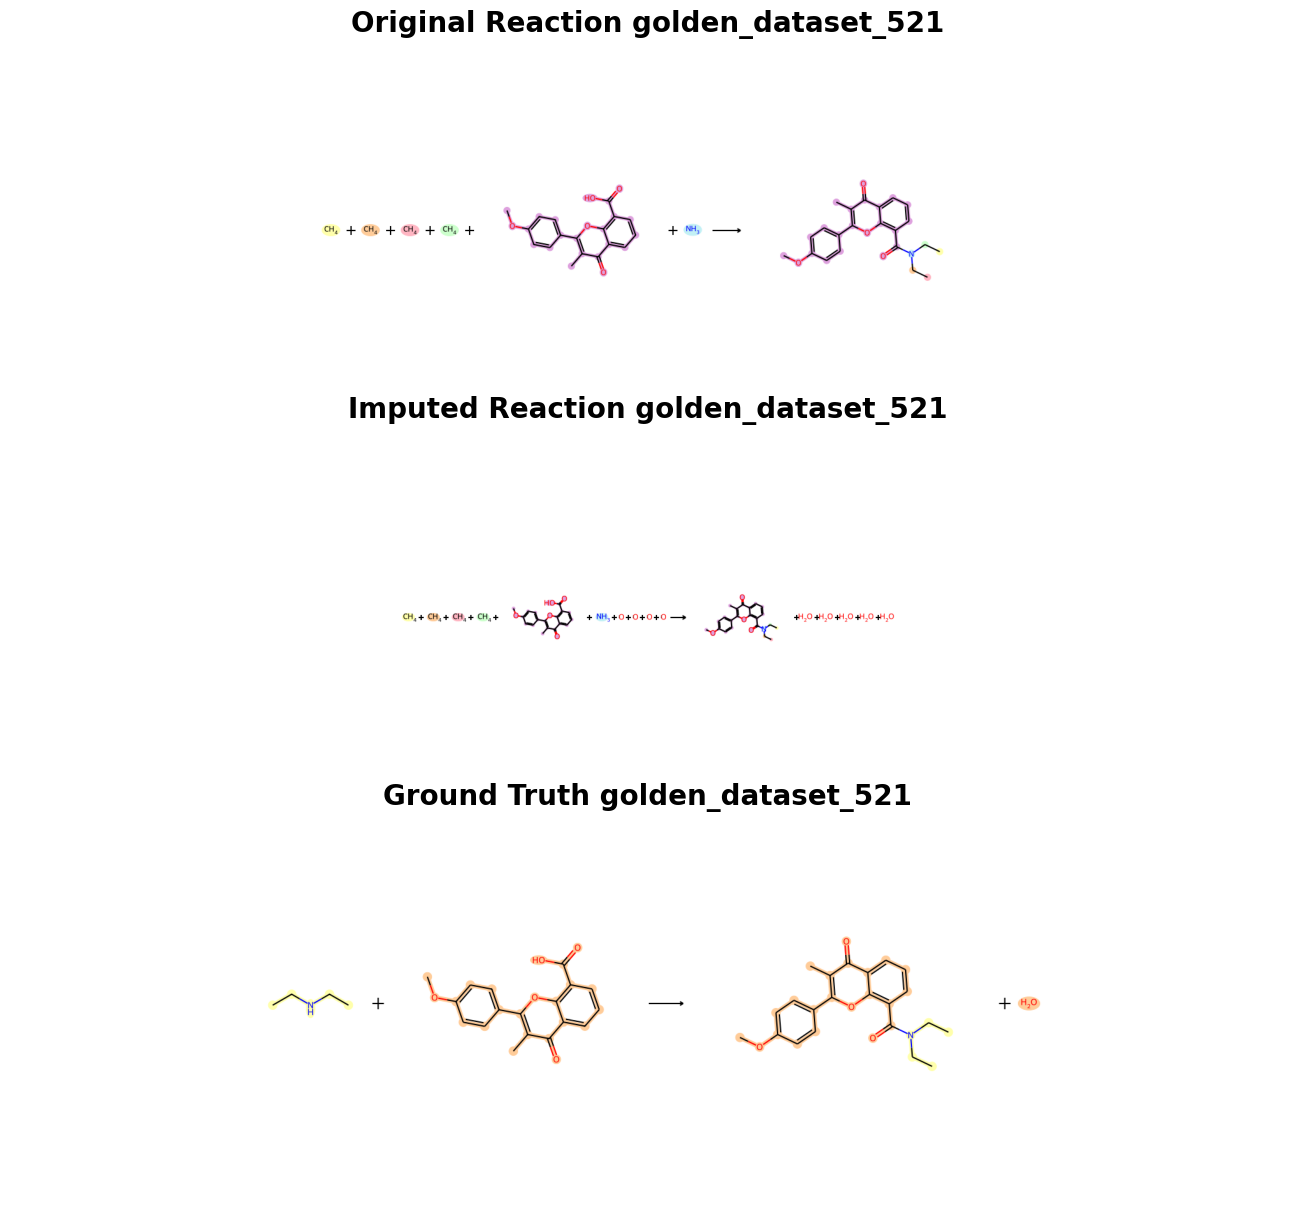

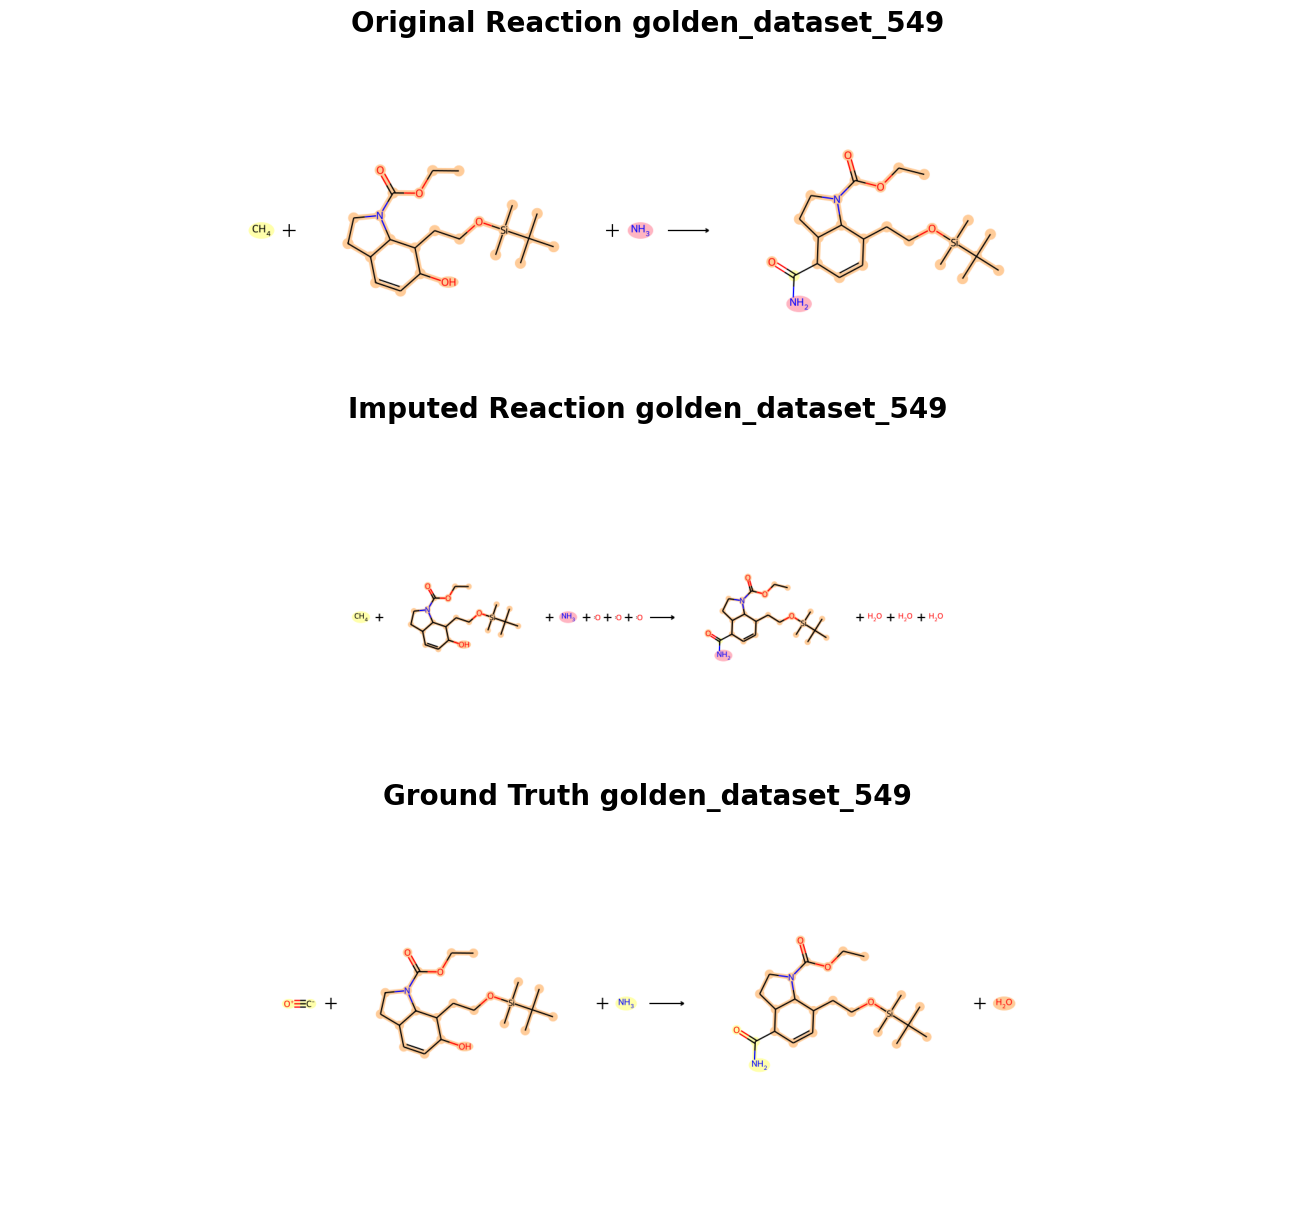

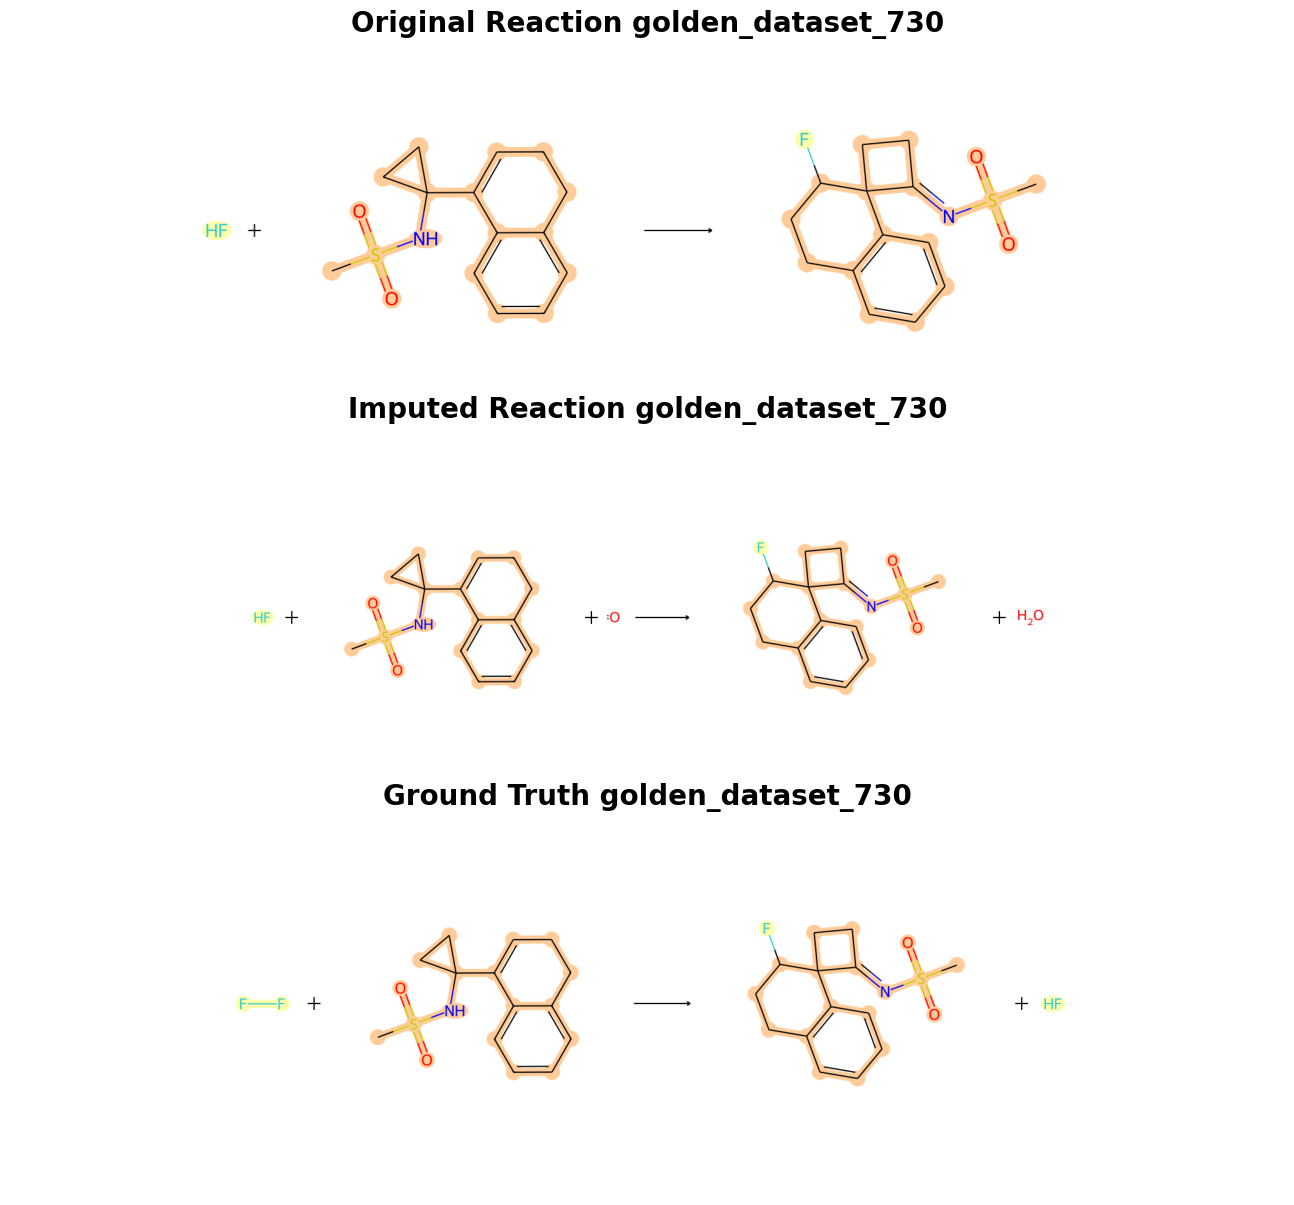

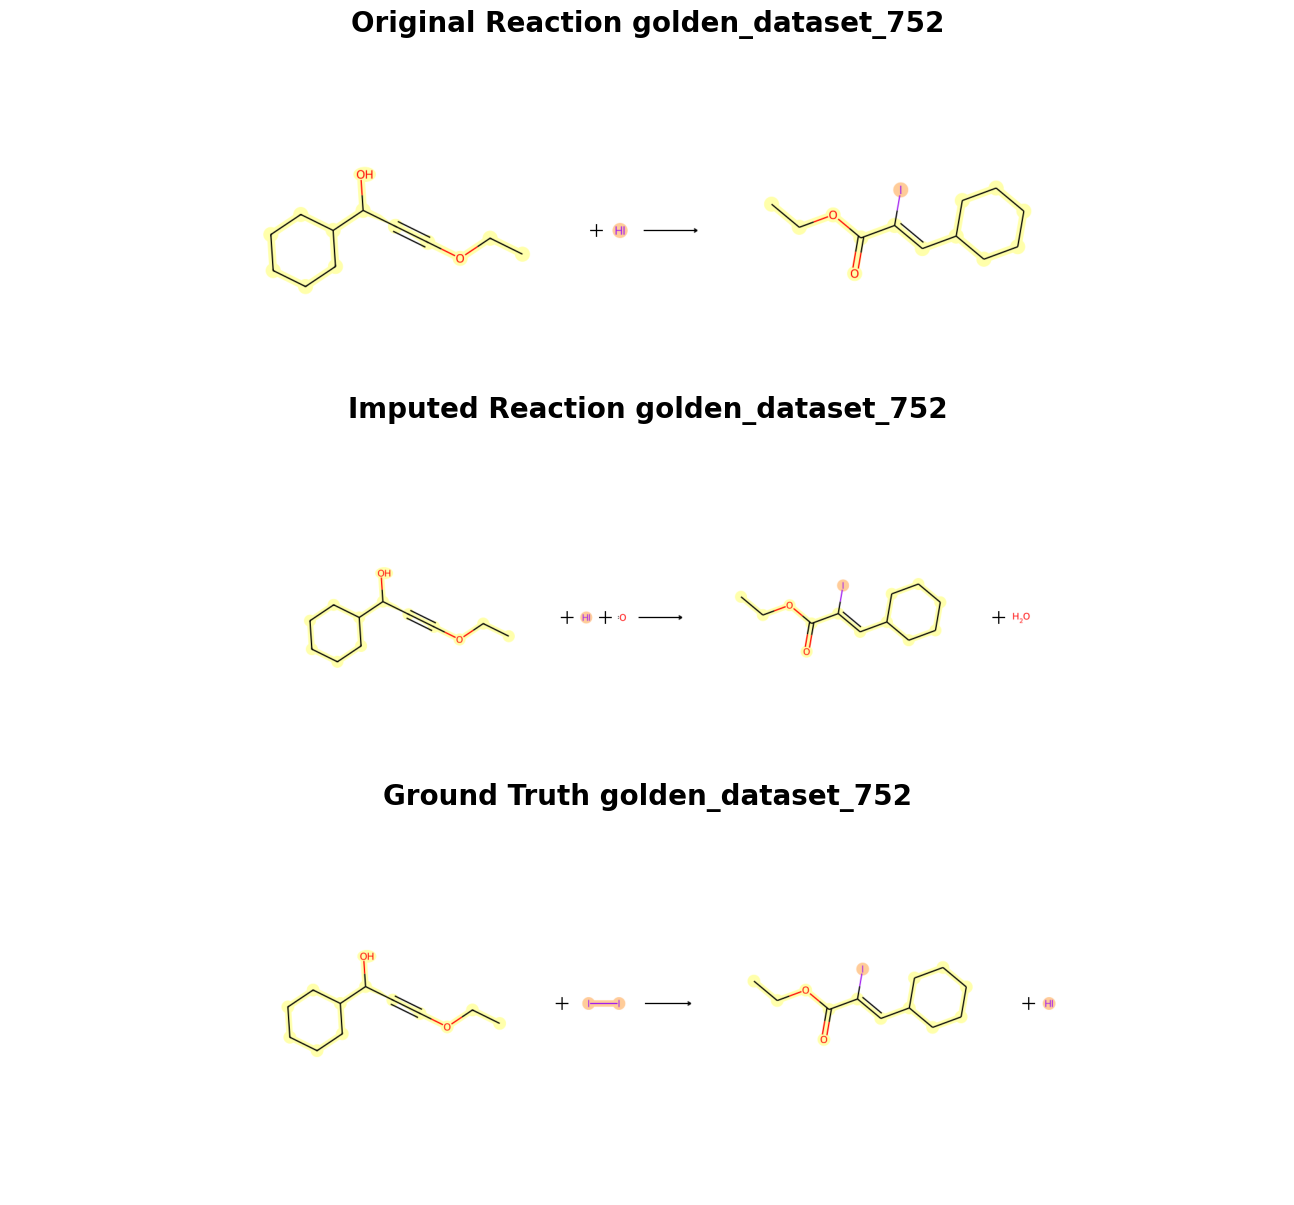

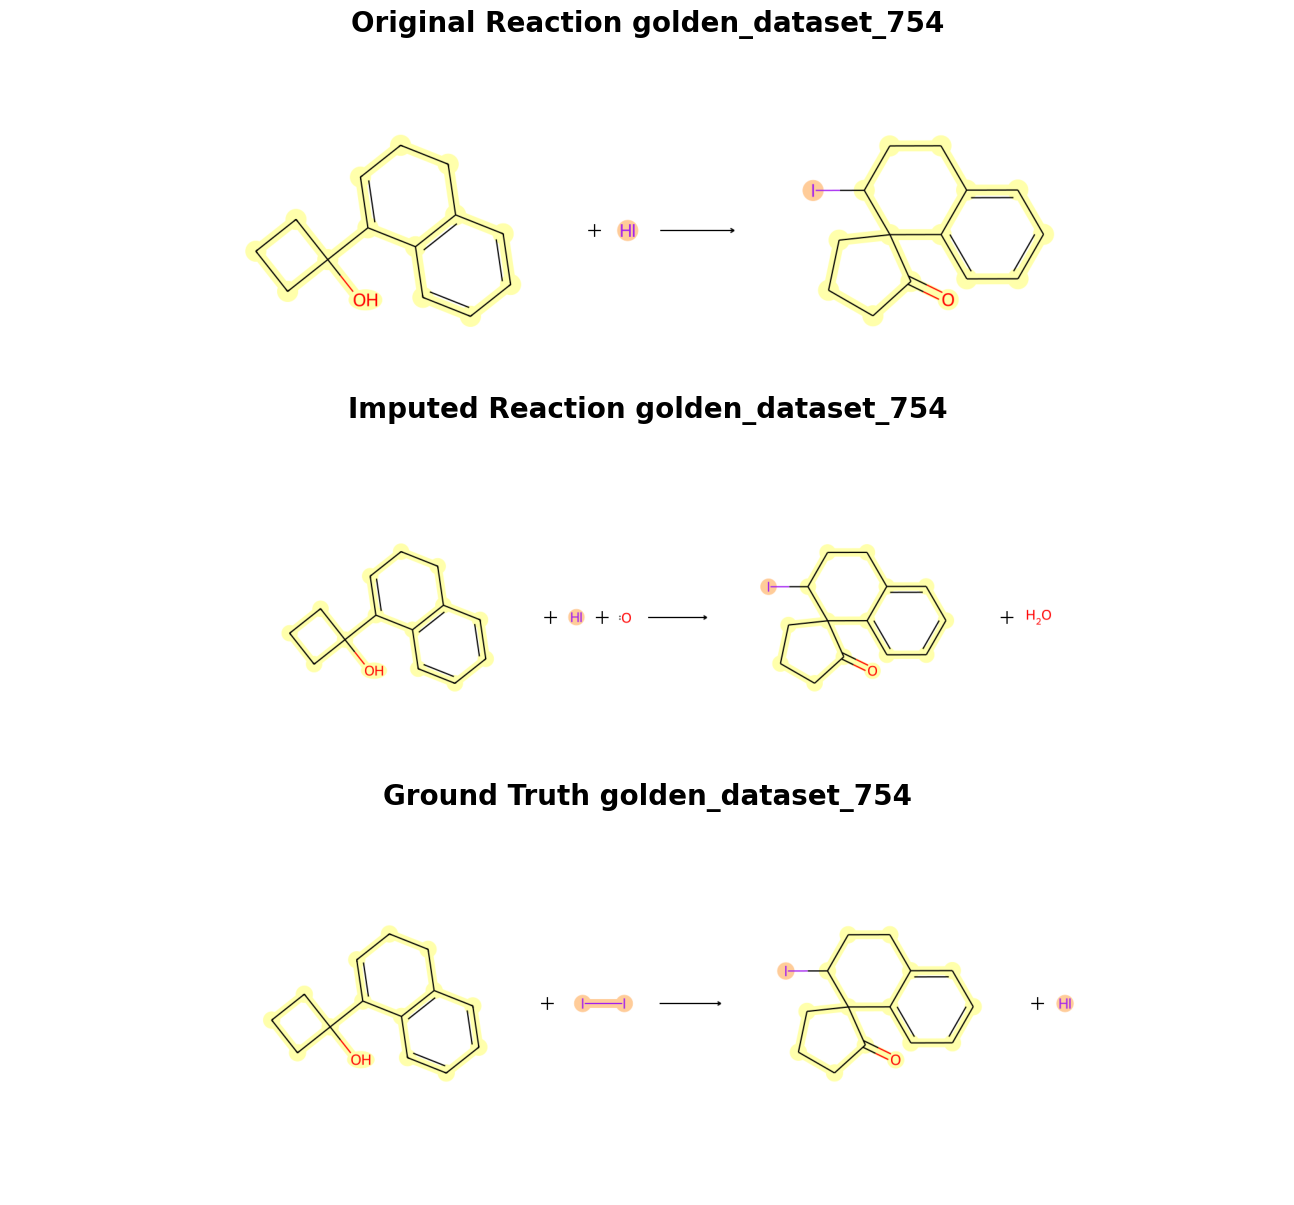

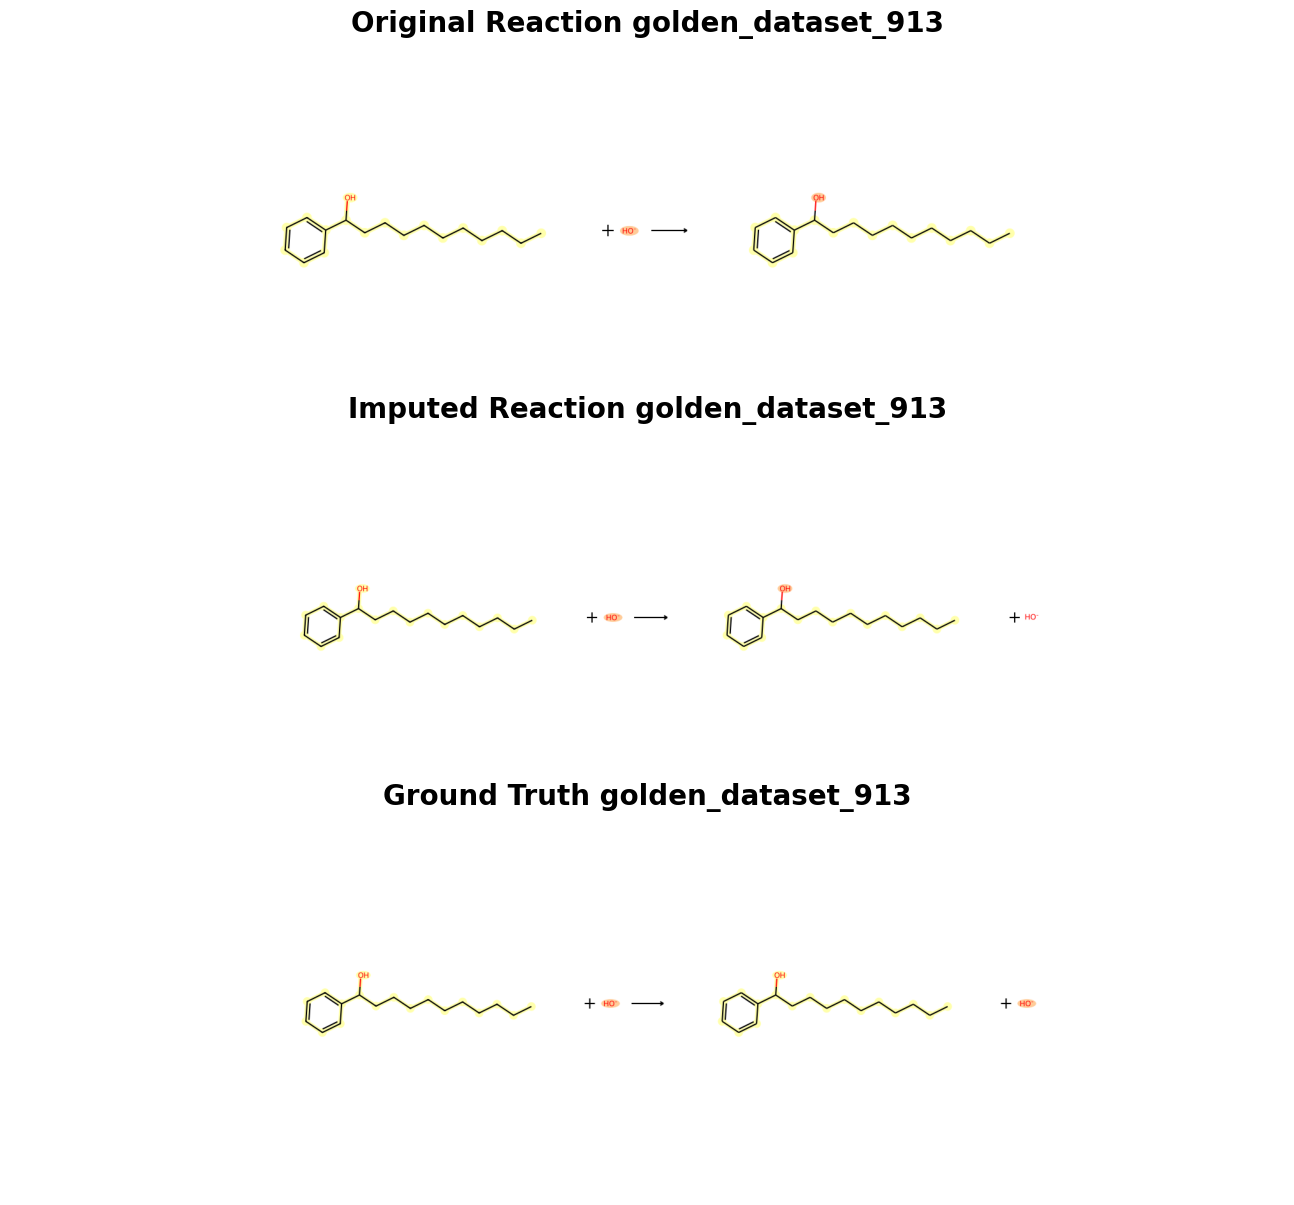

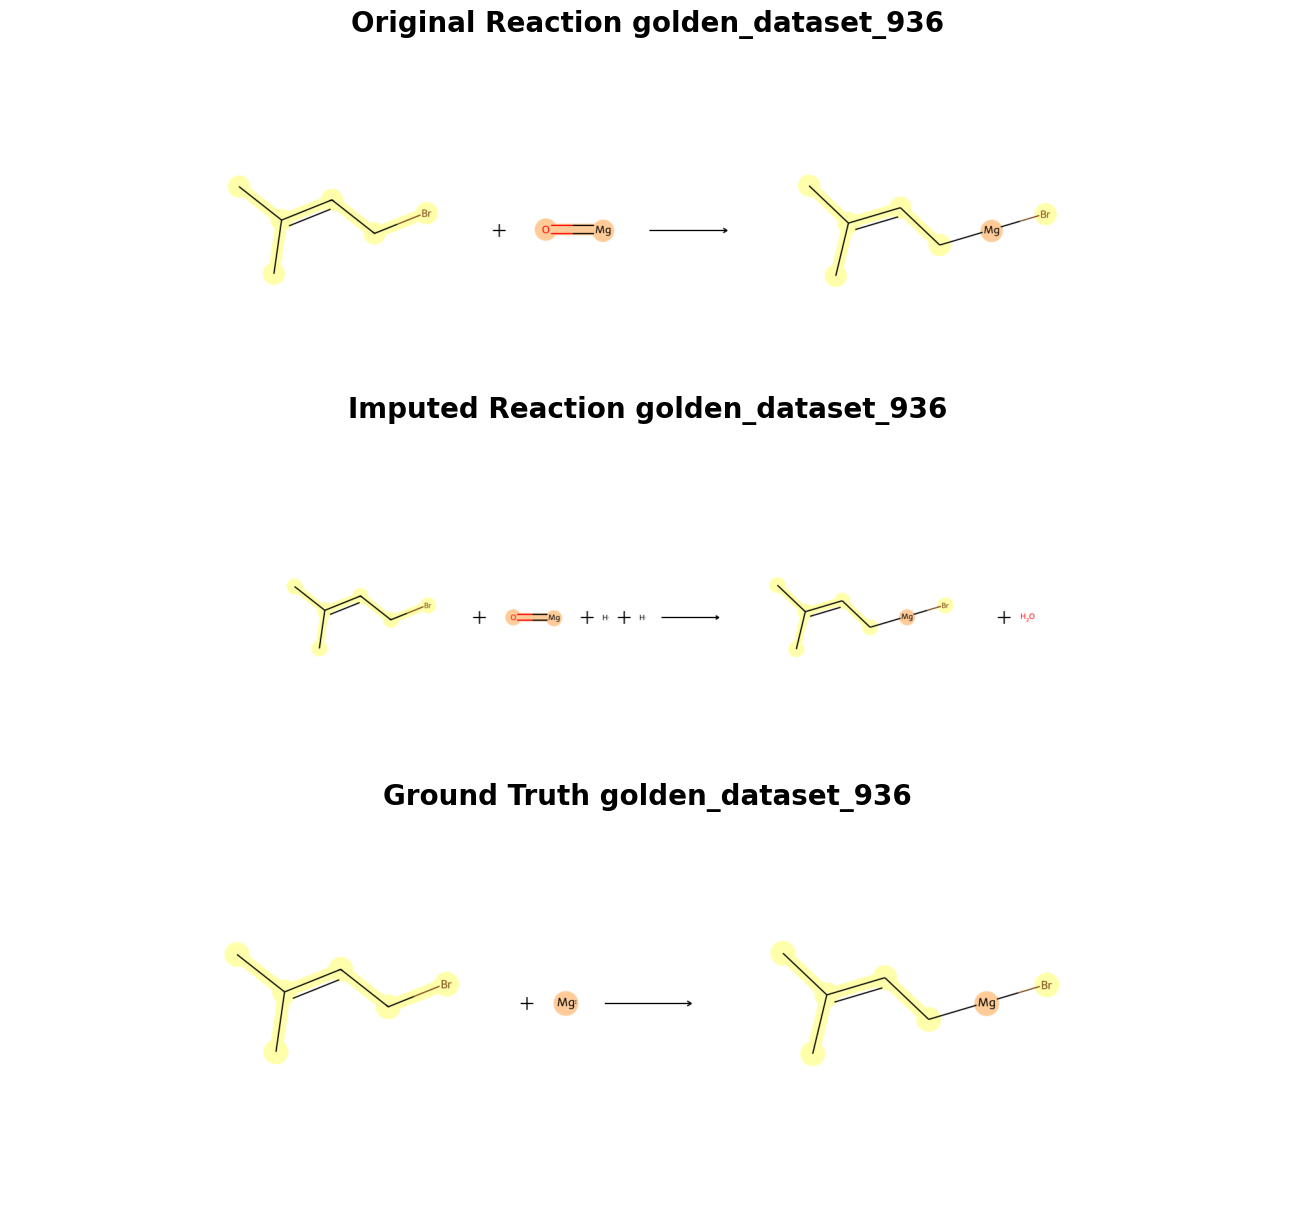

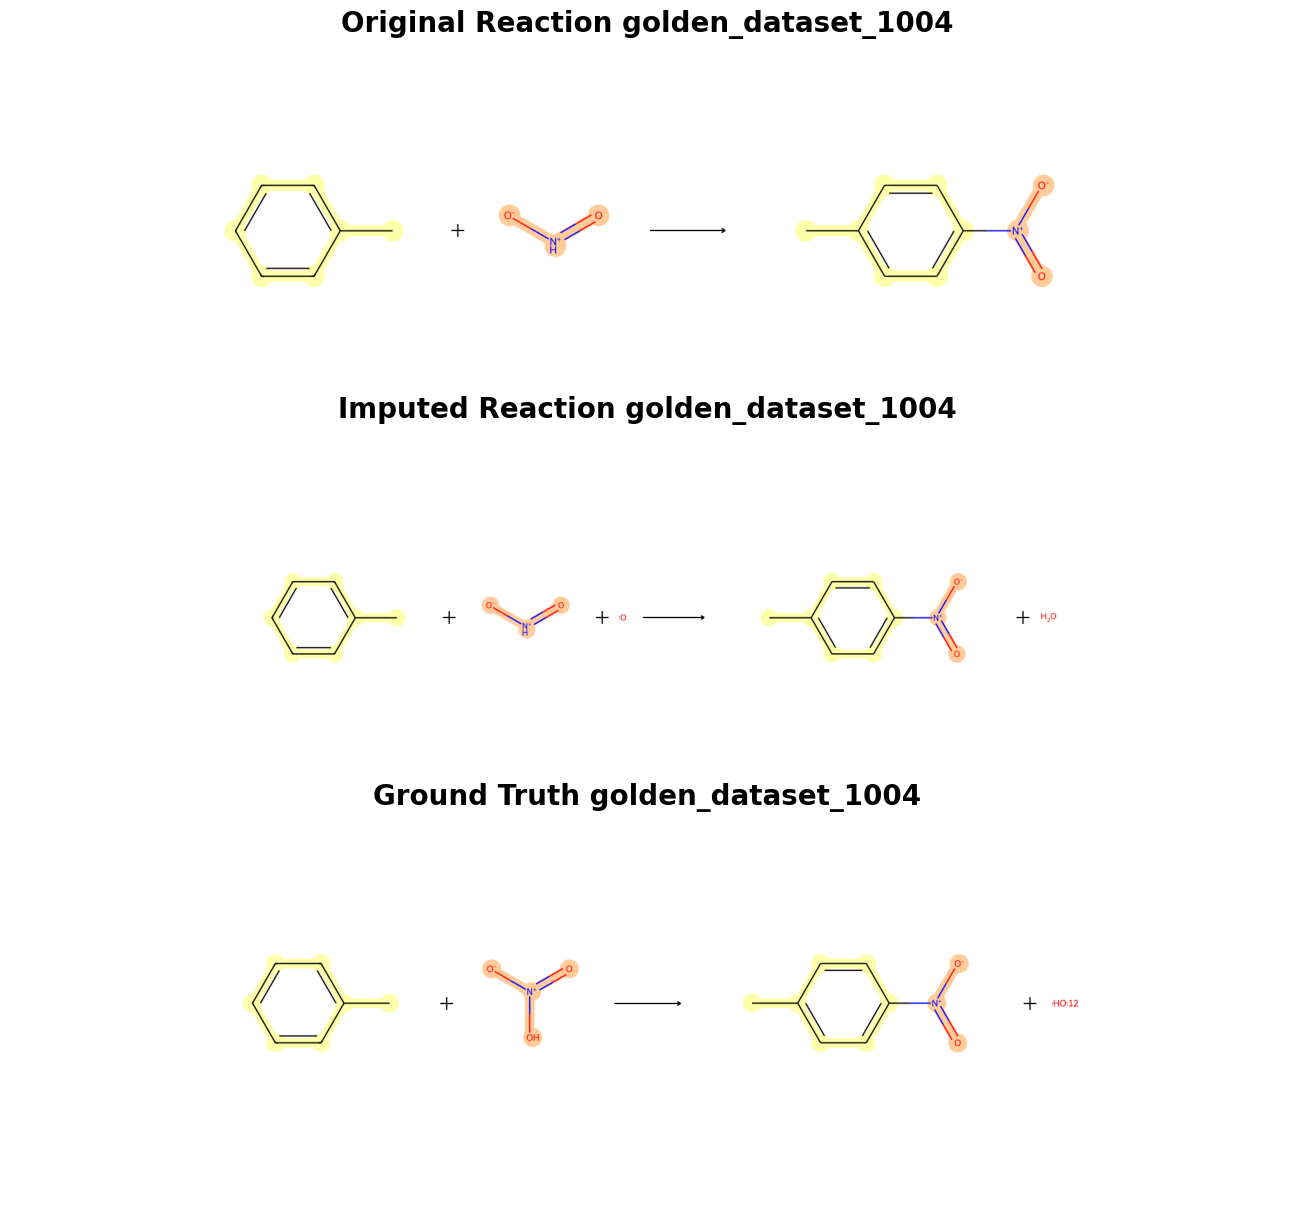

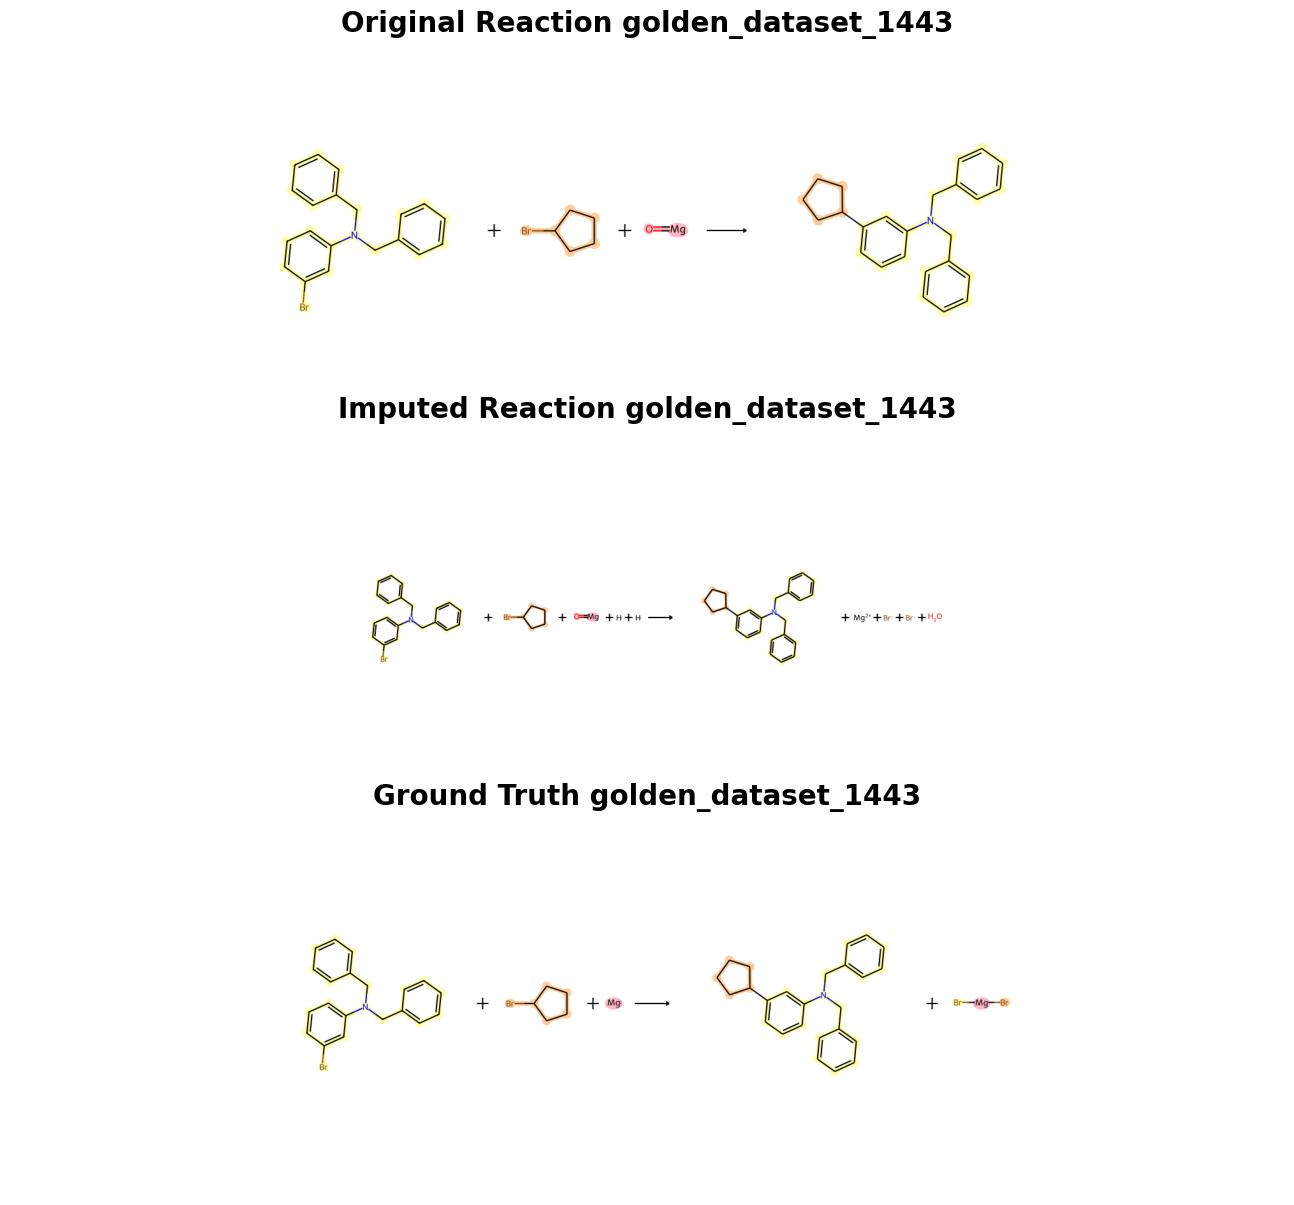

In [84]:
list_fig=[visualize_reactions(test[i]) for i in range(len(test))]

In [85]:
len(list_fig)

22

In [86]:
len(test)

22

In [93]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

def save_figures_to_pdf(figures, pdf_filename, orientation='portrait'):
    """
    Saves each figure in the list 'figures' to a separate page of a PDF file named 'pdf_filename',
    with the specified orientation.
    
    Parameters:
        figures (list of matplotlib.figure.Figure): The figures to save.
        pdf_filename (str): The filename of the PDF to save the figures to.
        orientation (str): The orientation of the pages, either 'portrait' or 'landscape'.
    """
    with PdfPages(pdf_filename) as pdf:
        for fig in figures:
            pdf.savefig(fig, orientation=orientation)
            plt.close(fig)  # Close the figure to free memory



# Save the figures to a PDF
save_figures_to_pdf(list_fig, 'wrong_reactions_golden.pdf')


In [88]:
%pwd

'/homes/biertank/tieu/Documents/Project/SynRBL/Pipeline/Validation'

In [ ]:
from SynRBL.SynVis.reaction_visualizer import ReactionVisualizer
vis = ReactionVisualizer()

vis.plot_reactions(golden[11], 'reactions', 'new_reaction', compare=True, show_atom_numbers=False)

In [ ]:
golden_wrong

In [ ]:
from SynRBL.rsmi_utils import load_database
golden = load_database('../../Data/Validation_set/golden_dataset/MCS/MCS_Impute.json.gz')
jaworski = load_database('../../Data/Validation_set/Jaworski/MCS/MCS_Impute.json.gz')
id_jaworski = ['Jaworski_139', 'Jaworski_221']
id_golden = ['golden_dataset_67', 'golden_dataset_373', 'golden_dataset_954', 'golden_dataset_1044', 'golden_dataset_1345', 'golden_dataset_1440', 'golden_dataset_1441', 'golden_dataset_1847']


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Set the random seed
seed_value = 42

# Generate the complete graph
G = nx.complete_graph(5)

# Generate the layout with a fixed seed
pos = nx.spring_layout(G, seed=seed_value)

# Draw the graph
nx.draw(G, pos, with_labels=True)

# Show the plot
plt.show()


In [ ]:
golden_check = [golden[key] for key, value in enumerate(golden) if value['R-id'] in id_golden]
jaworski_check = [jaworski[key] for key, value in enumerate(jaworski) if value['R-id'] in id_jaworski]

In [ ]:
from SynRBL.SynVis.reaction_visualizer import ReactionVisualizer
vis = ReactionVisualizer()
index = 1
print(jaworski_check[index]['R-id'])
vis.plot_reactions(jaworski_check[index], 'old_reaction', 'new_reaction', compare=True, show_atom_numbers=False)

In [ ]:
import pandas as pd

random_data = pd.read_csv('../../Data/Validation_set/USPTO_random_class.csv')
random_data.shape

In [ ]:
diff_data = pd.read_csv('../../Data/Validation_set/USPTO_diff.csv')
diff_data.shape

In [ ]:
unbalance_data = pd.read_csv('../../Data/Validation_set/USPTO_unbalance_class.csv')
unbalance_data.shape

In [ ]:
from SynRBL.rsmi_utils import load_database, save_database

art1 = load_database('../../Data/Validation_set/artificial_data_1/mcs_based_reactions.json.gz')
art2 = load_database('../../Data/Validation_set/artificial_data_2/mcs_based_reactions.json.gz')

In [ ]:
uspto_1 = load_database('../../Data/Validation_set/USPTO_random_class/rule_based_reactions.json.gz')

In [ ]:
uspto_1[176]

In [ ]:
import pandas as pd

test = pd.DataFrame(art1)

In [ ]:
test.shape

In [ ]:
test['reactants'].isnull().sum()

In [ ]:
jaworski = load_database('../../Data/Validation_set/Jaworski/mcs_based_reactions.json.gz')

In [ ]:
jaworski = load_database('../../Data/Validation_set/Jaworski/MCS/Condition_5.json.gz')
len(jaworski)

In [ ]:
jaworski = load_database('../../Data/Validation_set/Jaworski/MCS/Final_Graph.json.gz')

In [ ]:
len(jaworski)

In [ ]:
pd.DataFrame(jaworski).dropna()

In [ ]:
len(jaworski)

In [ ]:
golden = load_database('../../Data/Validation_set/golden_dataset/MCS/MCS_Impute.json.gz')

In [ ]:
golden_true = [golden[key] for key, value in enumerate(golden) if value['mcs_carbon_balanced']==True]
golden_false = [golden[key] for key, value in enumerate(golden) if value['mcs_carbon_balanced']==False]

In [ ]:
len(golden_false)

In [ ]:
from SynRBL.SynVis.reaction_visualizer import ReactionVisualizer
import matplotlib
vis = ReactionVisualizer()
for i in range(100,200):
    vis.plot_reactions(golden_false[i], 'old_reaction', 'new_reaction', compare=True, show_atom_numbers=False, savefig=True, pathname=f'../../Data/Validation_set/golden_dataset/check_mcs_false/{i}.png')
    matplotlib.pyplot.close()

In [ ]:
golden_false[28]

In [ ]:
rule = load_database('../../Data/Rules/rules_manager.json.gz')
rule

In [ ]:
import pandas as pd
jaworski = pd.read_csv('../../Data/Validation_set/golden_dataset.csv')

In [ ]:
uspto_1 = load_database('../../Data/Validation_set/USPTO_diff/mcs_based_reactions.json.gz')
uspto_rule_1 = load_database('../../Data/Validation_set/USPTO_diff/rule_based_reactions.json.gz')
uspto_2 = load_database('../../Data/Validation_set/USPTO_unbalance_class/mcs_based_reactions.json.gz')
uspto_rule_2 = load_database('../../Data/Validation_set/USPTO_unbalance_class/rule_based_reactions.json.gz')

In [ ]:
uspto_rule_1[0]

In [ ]:
art

In [ ]:
key_get = ['id', 'class', 'reactions']

In [ ]:
uspto_2.extend(uspto_rule_2)

In [ ]:
pd.DataFrame(uspto_2)[['id','class', 'reactions']].to_csv('../../Data/Validation_set/USPTO_unbalance_class.csv', index=False)

In [ ]:
pd.DataFrame(uspto_2)

In [ ]:
uspto_dff_1 =

In [ ]:
jaworski[jaworski.duplicated(subset=['reactions'], keep=False)]

In [ ]:
list_wrong = [11,213, 234, 221, 225, 227, 233, 239, 240, 241, 242, 249, 270, 273, 283, 366, 374, 375, 444, 449, 481, 635, 663]

In [ ]:
len(list_wrong)

In [ ]:
golden_wrong = [golden[i] for i in list_wrong]

In [ ]:
golden

In [ ]:
ground_truth

In [ ]:
ground_truth = golden.copy()

In [ ]:
import pandas as pd
ground_truth = pd.DataFrame(ground_truth)[['R-id', 'reactions']].to_dict(orient='records')

In [ ]:
ground_truth[630]['reactions'] = number_630
vis.plot_reactions(ground_truth[630], 'reactions', 'reactions', compare=False, savefig=False)

In [ ]:
# wrong reaction fix


number_444 = '[CH:17]=1[CH:18]=[CH:19][C:14](=[CH:15][CH:16]=1)[CH:12]([OH:13])[CH2:11][CH2:10][CH2:9][CH2:8][CH2:7][CH2:6][CH2:5][CH2:4][CH2:3][CH3:2].[OH-:1]>>[CH:17]=1[CH:18]=[CH:19][C:14](=[CH:15][CH:16]=1)[CH:12]([OH:13])[CH2:11][CH2:10][CH2:9][CH2:8][CH2:7][CH2:6][CH2:5][CH2:4][CH2:3][CH3:2].[OH-:1]'

number_449 = '[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][Br:6].[Mg:7]>>[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][Mg:7][Br:6]'

number_481  = '[CH:6]=1[CH:7]=[CH:8][CH:9]=[CH:10][C:5]=1[CH3:4].[O-:3][N+:2](=[O:1])[OH:11]>>[N+:2]([O-:3])(=[O:1])[C:8]1=[CH:7][CH:6]=[C:5]([CH3:4])[CH:10]=[CH:9]1.[OH:12]'


number_663 = '[CH:12]1=[C:11]([CH2:10][N:9]([CH2:17][C:18]2=[CH:19][CH:20]=[CH:21][CH:22]=[CH:23]2)[C:8]=3[CH:24]=[CH:25][CH:26]=[C:6]([CH:7]=3)[Br:29])[CH:16]=[CH:15][CH:14]=[CH:13]1.[CH2:3]1[CH2:4][CH2:5][CH:1]([CH2:2]1)[Br:27].[Mg:28]>>[CH2:2]1[CH2:3][CH2:4][CH2:5][CH:1]1[C:6]=2[CH:26]=[CH:25][CH:24]=[C:8]([CH:7]=2)[N:9]([CH2:17][C:18]=3[CH:19]=[CH:20][CH:21]=[CH:22][CH:23]=3)[CH2:10][C:11]=4[CH:16]=[CH:15][CH:14]=[CH:13][CH:12]=4.[Br:27][Mg:28][Br:29]'



In [ ]:
# wrong reaction rule based


number_621 ='[C:3](=[O:5])([CH2:2][CH3:1])[CH3:4].[NH2:8][N:7]([CH3:6])[C:9]1=[CH:10][CH:11]=[CH:12][CH:13]=[CH:14]1>>[CH:11]=1[CH:12]=[CH:13][CH:14]=[C:9]2[C:10]=1[C:2]([CH3:1])=[C:3]([CH3:4])[N:7]2[CH3:6].[NH3:8].[OH2:5]'

number_630 = '[CH2:7]([CH2:8][OH:9])[CH3:6].[Cl:1][C:2]([Cl:3])([Cl:4])[Cl:5].[CH:11]1=[CH:12][CH:13]=[CH:14][CH:15]=[C:16]1[P:10]([C:17]2=[CH:18][CH:19]=[CH:20][CH:21]=[CH:22]2)[C:23]1=[CH:24][CH:25]=[CH:26][CH:27]=[C:28]1>>[CH2:7]([CH3:6])[CH2:8][Cl:5].[Cl:1][CH:2]([Cl:3])[Cl:4].[CH:11]1=[CH:12][CH:13]=[CH:14][CH:15]=[C:16]1[P:10](=[O:5])([C:17]2=[CH:18][CH:19]=[CH:20][CH:21]=[CH:22]2)[C:23]1=[CH:24][CH:25]=[CH:26][CH:27]=[C:28]1'

In [ ]:

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdChemReactions as Reactions
from rdkit.Chem.Draw import IPythonConsole
from PIL import Image

display(Reactions.ReactionFromSmarts(number_283, useSmiles=True))

vis.plot_reactions(golden[283], 'reactions', 'new_reaction', compare=True, show_atom_numbers=False)


In [ ]:
golden[621]['reactions']

In [ ]:
from SynRBL.SynChemImputer.appel_reaction import AppelReaction

appel = AppelReaction()


In [ ]:
golden[283]['reactions']

In [ ]:
Chem.MolFromSmiles('[C-:26]#[O+:27]')

In [ ]:
test ='[C-:26]#[O+:27].[CH3:19][C:18]([CH3:20])([CH3:21])[Si:15]([CH3:16])([CH3:17])[O:14][CH2:13][CH2:12][CH:11]1[CH:10]2[CH:1]([CH:25]=[CH:24][CH:22]1[OH:23])[CH2:2][CH2:3][N:4]2[C:5](=[O:6])[O:7][CH2:8][CH3:9].[NH3:27]>>[CH3:19][C:18]([CH3:20])([CH3:21])[Si:15]([CH3:16])([CH3:17])[O:14][CH2:13][CH2:12][CH:11]1[CH:22]=[CH:24][CH:25]([CH:1]2[CH2:2][CH2:3][N:4]([C:5](=[O:6])[O:7][CH2:8][CH3:9])[CH:10]12)[C:26](=[O:27])[NH2:27].[OH2:23]'

In [ ]:
vis.plot_reactions(golden[283], 'reactions', 'new_reaction', compare=True, show_atom_numbers=False)

In [ ]:
save_database(ground_truth, '../../Data/Validation_set/golden_dataset/rule_based_ground_truth.json.gz')

In [ ]:
golden[630]['reactions']

In [ ]:
c1ccccc1P(c2ccccc2)c3ccccc3

In [ ]:
from SynRBL.SynVis.reaction_visualizer import ReactionVisualizer
vis = ReactionVisualizer()
vis.plot_reactions(golden[630], 'reactions', 'new_reaction', compare=True, show_atom_numbers=False)

In [ ]:
vis.plot_reactions(golden_wrong[16], 'reactions', 'new_reaction', compare=True, show_atom_numbers=False)

In [ ]:
# Jaworski class
jaworski = load_database('../../Data/Validation_set/Jaworski/rule_based_reactions.json.gz')
jaworski_167 = 'BrBr.CC1=C(C(OC)=O)C=CC=C1[N+]([O-])=O>>O=C(OC)C2=C(CBr)C([N+]([O-])=O)=CC=C2.Br'
jaworski_171 = 'CC1(O[C@@H]2COC([C@@H]2O1)O)C.Br[Mg]C=C.O>>CC1(O[C@@H]([C@H]([C@H](C=C)O)O1)CO)C.Br[Mg+][OH]'

In [ ]:
display(Reactions.ReactionFromSmarts(jaworski_171, useSmiles=True))

In [ ]:
import pandas as pd
ground_truth = jaworski.copy()
ground_truth = pd.DataFrame(ground_truth)[['R-id', 'reactions']].to_dict(orient='records')

In [ ]:
save_database(ground_truth, '../../Data/Validation_set/Jaworski/rule_based_ground_truth.json.gz')

In [ ]:
ground_truth[167]['reactions'] = jaworski_167
ground_truth[171]['reactions'] = jaworski_171

In [ ]:
ground_truth[167]

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

class ChemicalSpaceVisualizer:
    def __init__(self, reaction_smiles):
        self.reaction_smiles = reaction_smiles

    def visualize_reactants_and_products(self):
        # Parse the reaction SMILES string
        reaction = AllChem.ReactionFromSmarts(self.reaction_smiles)

        # Extract reactants and products
        reactants = reaction.GetReactants()
        products = reaction.GetProducts()

        # Generate 2D chemical structure diagrams for reactants and products
        reactant_mols = [Chem.MolFromSmiles(Chem.MolToSmiles(reactant)) for reactant in reactants]
        product_mols = [Chem.MolFromSmiles(Chem.MolToSmiles(product)) for product in products]

        # Create subplots for reactants and products
        num_reactants = len(reactants)
        num_products = len(products)
        num_subplots = num_reactants + num_products

        fig, axes = plt.subplots(1, num_subplots, figsize=(12, 4))

        for i, mol in enumerate(reactant_mols):
            Draw.MolToMPL(mol, ax=axes[i], size=(200, 200))
            axes[i].set_title(f"Reactant {i+1}")

        for i, mol in enumerate(product_mols):
            Draw.MolToMPL(mol, ax=axes[i+num_reactants], size=(200, 200))
            axes[i+num_reactants].set_title(f"Product {i+1}")

        plt.tight_layout()
        plt.show()

# Example usage:
reaction_smiles = "OC1(C=CC(=O)C=C1)C#Cc1ccccc1.C=C1CC(=O)O1>>CC(=O)Cc1cc(ccc1O)C#Cc1ccccc1"
visualizer = ChemicalSpaceVisualizer(reaction_smiles)
visualizer.visualize_reactants_and_products()


In [ ]:
from SynRBL.SynVis.reaction_visualizer import ReactionVisualizer
vis = ReactionVisualizer()
vis.plot_reactions(ground_truth[171], 'reactions', 'reactions', compare=False, show_atom_numbers=False)

In [ ]:
raw_mcs

TEST

In [ ]:
import pandas as pd
from SynRBL.rsmi_utils import load_database
jaworski = pd.read_csv('../../Data/Validation_set/Visualize/SynRBL - Jaworsky.csv')
jaworski=jaworski.iloc[:154, 1:4]
result = load_database('../../Data/Validation_set/Jaworski/MCS/MCS_Impute.json.gz')
raw_mcs = load_database('../../Data/Validation_set/Jaworski/mcs_based_reactions.json.gz')

In [ ]:
jaworski.fillna(0, inplace=True)
jaworski['BondChanges'] = jaworski[['Bond Break', 'Bond Form']].max(axis=1)
jaworski = jaworski.drop(['Bond Break', 'Bond Form'], axis=1)

In [ ]:
from rdkit import Chem
from copy import deepcopy

def calculate_carbon_difference(dictionary_list):
    updated_list = deepcopy(dictionary_list)  # Create a deep copy of the original list
    for entry in updated_list:
        reactant_smiles = entry['reactants']
        product_smiles = entry['products']
        
        reactant_mol = Chem.MolFromSmiles(reactant_smiles)
        product_mol = Chem.MolFromSmiles(product_smiles)
        
        if reactant_mol is not None and product_mol is not None:
            num_carbon_reactants = reactant_mol.GetNumAtoms(6)
            num_carbon_products = product_mol.GetNumAtoms(6)
            
            delta = abs(num_carbon_reactants - num_carbon_products)
            entry['carbon_difference'] = delta
        else:
            entry['carbon_difference'] = "Invalid SMILES"
    return updated_list

new_raw = calculate_carbon_difference(raw_mcs)

In [ ]:
def calculate_fragment_count(dictionary_list):
    updated_list = deepcopy(dictionary_list) 
    for entry in dictionary_list:
        reactant_smiles = entry['reactants']
        product_smiles = entry['products']

        # Counting the number of fragments in reactants and products
        reactant_fragment_count = len(reactant_smiles.split('.'))
        product_fragment_count = len(product_smiles.split('.'))
        total_fragment_count = reactant_fragment_count + product_fragment_count
        entry['fragment_count'] = total_fragment_count
        #print(total_fragment_count)
    return updated_list


In [ ]:
new_raw2 = calculate_fragment_count(new_raw)

In [ ]:
new_raw2[0]

In [ ]:
test1=pd.concat([pd.DataFrame(new_raw2)[['R-id','carbon_difference', 'fragment_count']],jaworski, pd.DataFrame(result)[['mcs_carbon_balanced']]], axis=1)

In [ ]:
test1['Result'] =test1['Result'].astype('bool')

In [ ]:
test2 = test1[test1['mcs_carbon_balanced']==True]

In [ ]:
test2['Result'].sum()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint

def visualize_accuracy(df, error_bar=True, chart_type='line', bar_color_palette='pastel', error_bar_color='black'):
    def calculate_accuracy_and_confidence(df, column):
        group_data = df.groupby(column)['Result'].agg(['sum', 'size'])
        group_data['Accuracy'] = group_data['sum'] / group_data['size']
        
        # Calculating Wilson confidence interval
        if error_bar:
            confidence_lower, confidence_upper = proportion_confint(group_data['sum'], group_data['size'], method='wilson')
            group_data['lower'] = group_data['Accuracy'] - confidence_lower
            group_data['upper'] = confidence_upper - group_data['Accuracy']

        return group_data.reset_index()

    # Calculate accuracy and confidence for each property
    accuracy_carbon = calculate_accuracy_and_confidence(df, 'carbon_difference')
    accuracy_fragment = calculate_accuracy_and_confidence(df, 'fragment_count')
    accuracy_bondchanges = calculate_accuracy_and_confidence(df, 'BondChanges')

    # Increase font size for better legibility
    sns.set_context("talk")

    # Plotting
    sns.set(style="whitegrid")
    plt.figure(figsize=(18, 6))

    # Plot helper function
    def plot_data(data, x, y, lower, upper, subplot_index, title, palette, ecolor):
        ax = plt.subplot(1, 3, subplot_index)

        if chart_type == 'line':
            if error_bar:
                # Use absolute values for error bars
                plt.errorbar(data[x], data[y], yerr=[abs(data[lower]), abs(data[upper])], fmt='o', capsize=5, ecolor=ecolor)
            sns.lineplot(data=data, x=x, y=y, marker='o')
        elif chart_type == 'bar':
            barplot = sns.barplot(data=data, x=x, y=y, palette=palette)
            ax.set_ylim(0, 1)  # Set the y-axis limit to show the full range of accuracy
            if error_bar:
                # Calculate the x position for each bar
                x_positions = [p.get_x() + p.get_width() / 2 for p in barplot.patches]
                # Use absolute values for error bars
                plt.errorbar(x_positions, data[y], yerr=[abs(data[lower]), abs(data[upper])], fmt='none', ecolor=ecolor, capsize=5, elinewidth=2)

        plt.title(title)
        plt.xlabel(x)
        plt.ylabel('Accuracy')
        # Customize the legend if necessary

    # Carbon Difference Accuracy
    plot_data(accuracy_carbon, 'carbon_difference', 'Accuracy', 'lower', 'upper', 1, 'Accuracy vs Carbon Difference', bar_color_palette, error_bar_color)

    # Fragment Count Accuracy
    plot_data(accuracy_fragment, 'fragment_count', 'Accuracy', 'lower', 'upper', 2, 'Accuracy vs Fragment Count', bar_color_palette, error_bar_color)

    # Bond Changes Accuracy
    plot_data(accuracy_bondchanges, 'BondChanges', 'Accuracy', 'lower', 'upper', 3, 'Accuracy vs Bond Changes', bar_color_palette, error_bar_color)

    plt.tight_layout()
    plt.show()

# Usage example
visualize_accuracy(test2, error_bar=True, chart_type='bar', bar_color_palette='coolwarm', error_bar_color='gray')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint

def visualize_accuracy(df, error_bar=True, chart_type='line', error_bar_color='black'):
    def calculate_accuracy_and_confidence(df, column):
        group_data = df.groupby(column)['Result'].agg(['sum', 'size'])
        group_data['Accuracy'] = group_data['sum'] / group_data['size']
        
        # Calculating Wilson confidence interval
        if error_bar:
            confidence_lower, confidence_upper = proportion_confint(group_data['sum'], group_data['size'], method='wilson')
            group_data['lower'] = group_data['Accuracy'] - confidence_lower
            group_data['upper'] = confidence_upper - group_data['Accuracy']

        return group_data.reset_index()

    # Calculate accuracy and confidence for each property
    accuracy_carbon = calculate_accuracy_and_confidence(df, 'carbon_difference')
    accuracy_fragment = calculate_accuracy_and_confidence(df, 'fragment_count')
    accuracy_bondchanges = calculate_accuracy_and_confidence(df, 'BondChanges')

    # Determine the min and max values for 'size' across all three subplots
    min_size = min(accuracy_carbon['size'].min(), accuracy_fragment['size'].min(), accuracy_bondchanges['size'].min())
    max_size = max(accuracy_carbon['size'].max(), accuracy_fragment['size'].max(), accuracy_bondchanges['size'].max())

    # Create a shared color normalization for the colorbar
    norm = plt.Normalize(vmin=min_size, vmax=max_size)
    cmap = plt.cm.get_cmap('coolwarm')

    # Increase font size for better legibility
    sns.set_context("talk")

    # Create a figure with 2 columns and 3 rows
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

    # Plot helper function
    def plot_data(data, x, y, lower, upper, size, subplot_index, title, ecolor):
        ax = axes[subplot_index, 0]

        if chart_type == 'line':
            if error_bar:
                # Use absolute values for error bars
                ax.errorbar(data[x], data[y], yerr=[abs(data[lower]), abs(data[upper])], fmt='o', capsize=5, ecolor=ecolor)
            sns.lineplot(data=data, x=x, y=y, marker='o', ax=ax)
        elif chart_type == 'bar':
            # Create a custom color palette based on the number of samples (size)
            colors = cmap(norm(data[size]))
            barplot = sns.barplot(data=data, x=x, y=y, palette=colors, ax=ax)
            ax.set_ylim(0, 1)  # Set the y-axis limit to show the full range of accuracy
            if error_bar:
                # Calculate the x position for each bar
                x_positions = [p.get_x() + p.get_width() / 2 for p in barplot.patches]
                # Use absolute values for error bars
                ax.errorbar(x_positions, data[y], yerr=[abs(data[lower]), abs(data[upper])], fmt='none', ecolor=ecolor, capsize=5, elinewidth=2)
            
            # Add a colorbar to display the number of samples (using the shared color normalization)
            cax = axes[subplot_index, 1]
            sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
            sm.set_array([])  # This line is necessary for the colorbar to work
            cbar = plt.colorbar(sm, cax=cax, label='Number of Samples')
            cbar.ax.set_ylabel('Number of Samples', rotation=-90, va="bottom")

        ax.set_title(title)
        ax.set_xlabel(x)
        ax.set_ylabel('Accuracy')
        # Customize the legend if necessary

    # Carbon Difference Accuracy
    plot_data(accuracy_carbon, 'carbon_difference', 'Accuracy', 'lower', 'upper', 'size', 0, 'Accuracy vs Carbon Difference', error_bar_color)

    # Fragment Count Accuracy
    plot_data(accuracy_fragment, 'fragment_count', 'Accuracy', 'lower', 'upper', 'size', 1, 'Accuracy vs Fragment Count', error_bar_color)

    # Bond Changes Accuracy
    plot_data(accuracy_bondchanges, 'BondChanges', 'Accuracy', 'lower', 'upper', 'size', 2, 'Accuracy vs Bond Changes', error_bar_color)

    plt.tight_layout()
    plt.show()

# Usage example
visualize_accuracy(test2, error_bar=True, chart_type='bar', error_bar_color='gray')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

def visualize_accuracy(df, error_bar=True, chart_type='line', error_bar_color='black', same_color_scale=False):
    def calculate_accuracy_and_confidence(df, column):
        group_data = df.groupby(column)['Result'].agg(['sum', 'size'])
        group_data['Accuracy'] = group_data['sum'] / group_data['size']
        
        # Filter out groups with zero accuracy
        group_data = group_data[group_data['Accuracy'] > 0]

        # Calculating Wilson confidence interval
        if error_bar:
            confidence_lower, confidence_upper = proportion_confint(group_data['sum'], group_data['size'], method='wilson')
            group_data['lower'] = group_data['Accuracy'] - confidence_lower
            group_data['upper'] = confidence_upper - group_data['Accuracy']

        return group_data.reset_index()

    # Custom color map with shades of blue and purple
    colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

    # Calculate accuracy and confidence for each property
    accuracy_carbon = calculate_accuracy_and_confidence(df, 'carbon_difference')
    accuracy_fragment = calculate_accuracy_and_confidence(df, 'fragment_count')
    accuracy_bondchanges = calculate_accuracy_and_confidence(df, 'BondChanges')

    # Normalization for colors
    if same_color_scale:
        norm = plt.Normalize(vmin=min(accuracy_carbon['size'].min(), accuracy_fragment['size'].min(), accuracy_bondchanges['size'].min()), 
                             vmax=max(accuracy_carbon['size'].max(), accuracy_fragment['size'].max(), accuracy_bondchanges['size'].max()))
    else:
        norm_carbon = plt.Normalize(vmin=accuracy_carbon['size'].min(), vmax=accuracy_carbon['size'].max())
        norm_fragment = plt.Normalize(vmin=accuracy_fragment['size'].min(), vmax=accuracy_fragment['size'].max())
        norm_bondchanges = plt.Normalize(vmin=accuracy_bondchanges['size'].min(), vmax=accuracy_bondchanges['size'].max())

    # Increase font size for better legibility
    sns.set_context("talk")

    # Create a figure with 3 subplots
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 10))

    # Plot helper function
    def plot_data(data, x, y, lower, upper, size, subplot_index, title, ecolor, norm):
        ax = axes[subplot_index]
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])  # Set an empty array for the mappable

        colors = [mcolors.to_rgba(cmap(norm(s))) for s in data[size]]

        if chart_type == 'line':
            if error_bar:
                ax.errorbar(data[x], data[y], yerr=[abs(data[lower]), abs(data[upper])], fmt='o', capsize=5, ecolor=ecolor)
            sns.lineplot(data=data, x=x, y=y, marker='o', ax=ax)
        elif chart_type == 'bar':
            sns.barplot(data=data, x=x, y=y, palette=colors, ax=ax)
            ax.set_ylim(0, 1)
            if error_bar:
                x_positions = [p.get_x() + p.get_width() / 2 for p in ax.patches]
                ax.errorbar(x_positions, data[y], yerr=[abs(data[lower]), abs(data[upper])], fmt='none', ecolor=ecolor, capsize=5, elinewidth=2)

        # Add grid lines
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

        # Color bar customization
        cbar = plt.colorbar(sm, ax=ax, label='Number of Samples', pad=0.05)
        cbar.ax.set_ylabel('Number of Samples', rotation=-90, va="bottom")

        ax.set_title(title)
        ax.set_xlabel(x)
        ax.set_ylabel('Accuracy')

    # Carbon Difference Accuracy
    plot_data(accuracy_carbon, 'carbon_difference', 'Accuracy', 'lower', 'upper', 'size', 0, 'Accuracy vs Carbon Difference', error_bar_color, norm_carbon if not same_color_scale else norm)

    # Fragment Count Accuracy
    plot_data(accuracy_fragment, 'fragment_count', 'Accuracy', 'lower', 'upper', 'size', 1, 'Accuracy vs Fragment Count', error_bar_color, norm_fragment if not same_color_scale else norm)

    # Bond Changes Accuracy
    plot_data(accuracy_bondchanges, 'BondChanges', 'Accuracy', 'lower', 'upper', 'size', 2, 'Accuracy vs Bond Changes', error_bar_color, norm_bondchanges if not same_color_scale else norm)

    plt.tight_layout()
    plt.show()

# Example usage
visualize_accuracy(df, error_bar=True, chart_type='bar', error_bar_color='gray', same_color_scale=True)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

def visualize_accuracy(df, error_bar=True, chart_type='line', error_bar_color='black', same_color_scale=False):
    def calculate_accuracy_and_confidence(df, column):
        group_data = df.groupby(column)['Result'].agg(['sum', 'size'])
        group_data['Accuracy'] = group_data['sum'] / group_data['size']
        
        # Filter out groups with zero accuracy
        group_data = group_data[group_data['Accuracy'] > 0]

        # Calculating Wilson confidence interval
        if error_bar:
            confidence_lower, confidence_upper = proportion_confint(group_data['sum'], group_data['size'], method='wilson')
            group_data['lower'] = group_data['Accuracy'] - confidence_lower
            group_data['upper'] = confidence_upper - group_data['Accuracy']

        return group_data.reset_index()

    # Enhanced color palette
    colors = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256).reversed()

    cmap = plt.get_cmap('flare',256)
    #cmap=cmap.reversed()



    # Calculate accuracy and confidence for each property
    accuracy_carbon = calculate_accuracy_and_confidence(df, 'carbon_difference')
    accuracy_fragment = calculate_accuracy_and_confidence(df, 'fragment_count')
    accuracy_bondchanges = calculate_accuracy_and_confidence(df, 'BondChanges')

    # Normalization for colors
    norm = plt.Normalize(vmin=0, vmax=max(accuracy_carbon['size'].max(), accuracy_fragment['size'].max(), accuracy_bondchanges['size'].max()))

    # Improved font settings for a professional look
    sns.set_context("notebook", font_scale=1.2)
    sns.set_style("whitegrid")

    # Create a figure with 3 subplots
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12), gridspec_kw={'hspace': 0.3})

    # Plot helper function
    def plot_data(data, x, y, lower, upper, size, subplot_index, xlabel, ecolor, norm):
        ax = axes[subplot_index]
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])

        colors = [mcolors.to_rgba(cmap(norm(s))) for s in data[size]]

        if chart_type == 'line':
            if error_bar:
                ax.errorbar(data[x], data[y], yerr=[abs(data[lower]), abs(data[upper])], fmt='o', capsize=5, ecolor=ecolor)
            sns.lineplot(data=data, x=x, y=y, marker='o', ax=ax)
        elif chart_type == 'bar':
            barplot = sns.barplot(data=data, x=x, y=y, palette=colors, ax=ax)
            ax.set_ylim(0, 1)
            if error_bar:
                x_positions = [p.get_x() + p.get_width() / 2 for p in barplot.patches]
                ax.errorbar(x_positions, data[y], yerr=[abs(data[lower]), abs(data[upper])], fmt='none', ecolor=ecolor, capsize=5, elinewidth=2)

        # Enhanced layout and grid lines
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
        ax.set_facecolor('white')

        # Enhanced color bar
        cbar = plt.colorbar(sm, ax=ax, label='Number of Samples', pad=0.05, aspect=10)
        cbar.ax.set_ylabel('Number of Samples', rotation=-90, va="bottom")

        # Set x-tick labels to the top
        ax.xaxis.set_label_position('bottom')
        ax.xaxis.tick_top()

        # Set labels
        ax.set_xlabel(xlabel, fontsize=12, fontweight='bold')
        ax.set_ylabel('Accuracy', fontsize=12)

        # Add subplot labels
        ax.text(-0.1, 1.1, chr(65 + subplot_index), transform=ax.transAxes, size=20, weight='bold')

    # Plot data for each subgroup with custom x-labels
    plot_data(accuracy_carbon, 'carbon_difference', 'Accuracy', 'lower', 'upper', 'size', 0, 'Nunber of Carbons Difference', error_bar_color, norm)
    plot_data(accuracy_fragment, 'fragment_count', 'Accuracy', 'lower', 'upper', 'size', 1, 'Number of Fragments', error_bar_color, norm)
    plot_data(accuracy_bondchanges, 'BondChanges', 'Accuracy', 'lower', 'upper', 'size', 2, 'Number of Bond Changes', error_bar_color, norm)

    plt.tight_layout(pad=4.0)
    plt.show()

# Example usage
visualize_accuracy(df, error_bar=True, chart_type='bar', error_bar_color='gray', same_color_scale=False)


In [ ]:
colors = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
cmap

In [ ]:
cmap = plt.get_cmap('coolwarm',256)
cmap.reversed()

In [ ]:
test1

In [ ]:
test2

In [ ]:
test2

In [ ]:
test2

In [ ]:
accuracy_carbon